# <h1> Wstep </h1>
**Celem projektu jest sprawdzenie**, czy na podstawie danych pochodzacych z: https://covid19datahub.io/index.html mozemy **przewidziec globalna a takze lokalna liczbe zachorowan oraz liczbe smierci spowodowana choroba COVID-19 przy uzyciu roznych modeli uczenia maszynowego.** Problem jest bardzo zlozony i sprawil wiele problemow naukowcom oraz epidemiologa z calego swiata, poniewaz na przebieg pandemii mialy wplyw dziesiatki czynnikow zalezne od kazdego panstwa. Nasz zbior danych swietnie odzwierciedla ten problem, zawiera 47 roznych zmiennych o wysokim zroznicownaiu miedzy soba. Zmienne (dla skrocenia opisu wymienie tylko czesc - pozostale mozna znalezc w dokumentacji) mozemy podzielic na kategorie (zgodnie z dokumentacja: https://covid19datahub.io/articles/docs.html) na:
<h3> 1. Identifiers </h3>
<ul>
    <li>
        <b>id</b> - unikalny identyfikator dla jednostki geograficznej
    </li>
    <li>
       <b>date</b> - data, kiedy wykonana zostala obserwacja w formacie RRRR-MM-DD
    </li>
</ul>
<h3> 2. Zmienne epidemiologiczne </h3>
<ul>
    <li>
        <b>confirmed</b> - skumulowana liczba potwierdzonych przypadkow zakazenia (<strong>bedziemy starali sie przewidziec</strong>)
    </li>
    <li>
        <b>deaths</b> - skumulowana liczba smierci (<strong>bedziemy starali sie przewidziec</strong>)
    </li>
    <li>
        <b>recovered</b> - skumulowana liczba pacjentow zwolnionych ze szpitali lub uznanych za ozdrowiencow
    </li>
    <li>
        <b>tests</b> - skumulowana liczba testow
    </li>
    <li>
        <b>vaccines</b> - skumulowana liczba podanych dawek
    </li>
    <li>
        <b>people_vaccinated</b> - skumulowana liczba ludzi, ktorzy przyjeli przynajmniej jedna dawke szczepionki
    </li>
    <li>
        <b>people_fully_vaccinated</b> - skumulowana liczba osob, ktore otrzymaly wszystkie dawki przepisane protokolem szczepien
    </li>
    <li>
        <b>hosp</b> - liczba pacjentow wymagajacych hospitalizacji danego dnia
    </li>
    <li>
        <b>icu</b> - liczba pacjentow przebywajacych na oddziale intensywnej terapii danego dnia
    </li>
    <li>
        <b>vent</b> - liczba pacjentow wymagajacych uzycia respiratora danego dnia
    </li>
</ul>
<h3> 3. Ocena prowadzonej polityki </h3>
<ul>
    <li>
        <b>school_closing</b> - ocena w przedziale 0-3, gdzie 0 oznacza brak ograniczen w dzialaniu szkol, 3 oznacza zamkniecie szkol na kazdym poziomie edukacji
    </li>
    <li>
        <b>stay_home_restrictions</b> - ocena w przedziale 0-3, gdzie 0 oznacza brak ograniczen w opuszczaniu domow, 3 oznacza calkowity zakaz wychodzenia z malymi wyjatkami (np. jedna osoba moze opuscic dom raz w tygodniu w celu zrobienia zakupow itd.)
    </li>
    <li>
        <b>itd. (pozostale zmienne mozna znalezc w dokumentacji)</b>
    </li>
</ul>
<h3> 4. Zmienne dotyczace podzialu administracyjnego </h3>
<ul>
    <li>
        <b>administrative_area_level</b> - poziom podzialu administracyjnego (1 - panstwa, 2 - stany, regiony itp., 3 - miasta, gminy i lokalne odpowiedniki)
    </li>
    <li>
        <b>itd. (pozostale zmienne mozna znalezc w dokumentacji)</b>
    </li>
</ul>
<h3> 5. Wspolrzedne geograficzne </h3>
<ul>
    <li>
        <b>latitude	</b> - szerokosc geograficzna
    </li>
    <li>
        <b>longitude </b> - dlugosc geograficzna
    </li>
</ul>
<h3> 6. Kody ISO </h3>
<ul>
    <li>
        <b>iso_alpha_3</b> - 3-literowy kod kraju zgodnie z normą ISO 3166-1 Alpha-3
    </li>
    <li>
        <b>itd. (pozostale zmienne mozna znalezc w dokumentacji)</b>
    </li>
</ul>
<h3> 7. Klucze zewnetrzne </h3>
<ul>
    <li>
        <b>key_local</b> - Identyfikator obszaru administracyjnego używany przez władze lokalne, zwykle krajowy instytut statystyczny lub jego odpowiednik lokalny. Np. key_local to kody FIPS dla Stanów Zjednoczonych, kody IBGE dla Brazylii, kody ISTAT dla Włoch itp.
    </li>
    <li>
        <b>itd. (pozostale zmienne mozna znalezc w dokumentacji)</b>
    </li>
</ul><br>

Z punktu widzenia naszego projektu najcenniejsze beda zmienne epidemiologiczne, poniewaz bezposrednio dotycza smierci i przypadkow, ktore zostaly zdiagnozowane. Oczywiscie w miare mozliwosci sprobujemy wykorzystac rowniez inne zmienne. Na poczatku dokonamy eksploracyjnej analizy danych, gdzie postaramy sie wyciagnac jak najwiecej wnioskow (dlaczego wystepuja np. braki w danych, co moze byc ich przyczyna). Nastepnie postaramy sie wybrac odpowiednie zmienne do analizy i rozpoczniemy proces tworzenia modeli ML. Przejdzmy wiec do dzialania.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import sklearn

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
from covid19dh import covid19
data, src = covid19(verbose = False) 

# <h1> Dane globalne </h1>
## <h2> 1. Eksploracyjna analiza danych. </h2>
### <h3> 1.1 Sprawdzenie rozmiaru danych, kolumn itp. </h3>

In [3]:
print(f'Wymiary naszego zbioru danych: {data.shape}, rozmiar: {data.size}')

Wymiary naszego zbioru danych: (189691, 47), rozmiar: 8915477


Jak widzimy nasz zbior jest **bardzo obszerny**. Musimy go zredukowac, aby byc w stanie sprawnie na nim operowac. Sprawdzmy kolejne informacje.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189691 entries, 131055 to 166305
Data columns (total 47 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   id                                   189691 non-null  object        
 1   date                                 189691 non-null  datetime64[ns]
 2   confirmed                            173236 non-null  float64       
 3   deaths                               157208 non-null  float64       
 4   recovered                            70337 non-null   float64       
 5   tests                                78154 non-null   float64       
 6   vaccines                             48272 non-null   float64       
 7   people_vaccinated                    45922 non-null   float64       
 8   people_fully_vaccinated              43566 non-null   float64       
 9   hosp                                 32273 non-null   float64    

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
confirmed,173236.0,7.496052e+05,3.696325e+06,0.00,2365.0000,2.417500e+04,2.470138e+05,8.198386e+07
deaths,157208.0,1.491831e+04,6.209463e+04,0.00,68.0000,6.060000e+02,5.213500e+03,9.969160e+05
recovered,70337.0,5.582857e+05,2.244889e+06,0.00,2930.0000,2.643700e+04,2.199710e+05,3.097475e+07
tests,78154.0,1.930074e+07,7.913347e+07,0.00,323443.2500,1.822806e+06,9.110458e+06,9.214000e+09
vaccines,48272.0,4.835590e+07,2.412354e+08,0.00,308839.5000,2.888244e+06,1.625431e+07,3.355535e+09
people_vaccinated,45922.0,1.805556e+07,7.541146e+07,0.00,182714.0000,1.709596e+06,8.215279e+06,1.286049e+09
people_fully_vaccinated,43566.0,1.467090e+07,6.223247e+07,0.00,128306.5000,1.286528e+06,6.893893e+06,1.251042e+09
hosp,32273.0,6.129006e+03,3.537874e+04,0.00,98.0000,6.610000e+02,2.956000e+03,8.752580e+05
icu,29903.0,7.862723e+02,2.410596e+03,0.00,20.0000,1.110000e+02,5.410000e+02,2.889100e+04
vent,5521.0,5.204660e+02,7.153114e+02,0.00,35.0000,1.880000e+02,7.910000e+02,4.077000e+03


Na podstawie powyzszych "badan" mozemy powiedziec, ze dane sa wysoce zroznicowane pod wzgledem cech. Posiadamy kolumny zawierajace zarowno skumulowane wartosci dotyczace ilosci smierci, ocene radykalnosci polityki prowadzonej przez dane panstwo, informacje o podziale administracyjnym jak i wspolrzedne danego panstwa, co daje spore mozliwosci analizy. Wyswietlmy pierwsze 10 wierszy kazdej z cech.

In [6]:
data.head(10).T

,131055,131056,131057,131058,131059,131060,131061,131062,131063,131064
id,0094b645,0094b645,0094b645,0094b645,0094b645,0094b645,0094b645,0094b645,0094b645,0094b645
date,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00
confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recovered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tests,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vaccines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
people_vaccinated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
people_fully_vaccinated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hosp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <h3> 1.2 Sprawdzenie duplikatow. </h3>

In [7]:
data[data.duplicated(keep = False)]

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm


W naszym zbiorze danych **nie wystepuja duplikaty.**
### <h3> 1.3 10 panstw o najwyzszej sumarycznej liczbie zgonow spowodowanych choroba COVID-19 z krotkim podsumowaniem brakow w danych. </h3>

In [8]:
def top_10_countries_by_feature(data: pd.DataFrame, feature: str) -> pd.DataFrame:
    top_10 = data.groupby(['iso_alpha_3'])[feature].max().nlargest(10)
    top_10_df = pd.DataFrame(top_10).reset_index()
    top_10_df[f'{feature}_NaN'] = [(data[data['iso_alpha_3'] == country][feature].isnull().sum()) for country in top_10.index]
    top_10_df['NaN [%]'] = [round((top_10_df[f'{feature}_NaN'][id] / len(data[data['iso_alpha_3'] == country][feature]) * 100), 2) for id, country in enumerate(top_10.index)]
    top_10_df.sort_values(feature, ascending = False)
    return top_10_df

In [9]:
top_10_countries_deaths = top_10_countries_by_feature(data, 'deaths')
top_10_countries_deaths

,iso_alpha_3,deaths,deaths_NaN,NaN [%]
0,USA,996916.0,0,0.00
1,BRA,664426.0,0,0.00
2,IND,524103.0,49,5.83
3,RUS,369548.0,57,6.79
4,MEX,324465.0,78,9.06
5,PER,203193.0,13,1.92
6,GBR,176687.0,32,3.85
7,ITA,164846.0,0,0.00
8,IDN,156396.0,49,5.83
9,COL,151310.0,12,1.83


**Najwiecej** odnotowanych zgonow spowodowanych przez chorobe COVID-19 mamy dla **USA - 996160.** Drugie niechlubne miejsce w rankingu zajmuje Brazylia, na trzecim miejscu znajduja sie Indie. Panstwa te maja braki w danych dotyczacych smierci na poziomie ponizej 6%, wiec mozemy uznac je za wiarygodne jeszcze przed czyszczeniem.

### <h3> 1.4 10 panstw o najwyzszej sumarycznej liczbie potwierdzonych przypadkow zakazenia choroba COVID-19  z krotkim podsumowaniem brakow w danych. </h3>

In [10]:
top_10_countries_confirmed = top_10_countries_by_feature(data, 'confirmed')
top_10_countries_confirmed

,iso_alpha_3,confirmed,confirmed_NaN,NaN [%]
0,USA,81983860.0,0,0.00
1,IND,43107689.0,8,0.95
2,BRA,30574245.0,0,0.00
3,FRA,28229588.0,2,0.24
4,DEU,25503878.0,12,1.43
5,GBR,22144628.0,0,0.00
6,RUS,17971207.0,9,1.07
7,KOR,17658794.0,0,0.00
8,ITA,16915301.0,0,0.00
9,TUR,15046779.0,49,5.83


Zgodnie z naszymi przewidywaniami na podium pojawiaja sie dokladnie te same panstwa. **Na pierwszym miejscu USA z wynikiem na poziomie 81735643**, na drugim Indie a na trzecim Brazylia. Widzimy rowniez, ze ponownie braki w danych sa bardzo male, w tym przypadku dla tych rzech panstw nie przekraczaja 1%.

### <h3> 1.5 Serie czasowe. </h3>
#### <h4> 1.5.1 Wizualizacja liczby zgonow dla kazdego miesiaca z wykorzystaniem Plotly. </h4>

In [11]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

def covid19_map(data: pd.DataFrame, country_names: str, date: str, target: str, title: str) -> None:
    data_groupped_by_country_month = data.groupby([country_names, data[date].dt.to_period('M')])[target].sum().reset_index()
    fig = px.choropleth(data_groupped_by_country_month, locations = country_names,
                    color = target,
                    animation_frame = data_groupped_by_country_month[date].astype(str),
                    color_continuous_scale = "OrRd")
                    
    fig.update_layout(title_text = title, title_x = 0.5)
    fig.show(renderer = 'notebook_connected')
    
covid19_map(data, 'iso_alpha_3', 'date', 'deaths', 'Smierci spowodowane choroba COVID-19')

#### <h4> 1.5.2 Wizualizacja liczby potwierdzonych przypadkow dla kazdego miesiaca z wykorzystaniem Plotly. </h4>

In [12]:
covid19_map(data, 'iso_alpha_3', 'date', 'confirmed', 'Potwierdzone przypadki zakazenia choroba COVID-19')

### <h3> 1.6 Badanie brakow w danych. </h3>
Nasze dane wydaja sie zawierac **bardzo duza liczbe NaN'ow - brakow w danych.** Sprawdzmy to.

In [13]:
print(f'Nasze dane zawieraja {data.isnull().sum().sum() / data.size * 100:.2f}% brakow.')

Nasze dane zawieraja 32.52% brakow.


In [14]:
print('Ilosci brakow danych dla kazdej z kolumn: \n')
data.isnull().sum().sort_values(ascending = False)

Ilosci brakow danych dla kazdej z kolumn: 



key_nuts                               189691
key_local                              189691
administrative_area_level_2            189691
administrative_area_level_3            189691
vent                                   184170
icu                                    159788
hosp                                   157418
people_fully_vaccinated                146125
people_vaccinated                      143769
vaccines                               141419
key_apple_mobility                     134073
recovered                              119354
tests                                  111537
key_google_mobility                     77262
government_response_index               37552
economic_support_index                  37525
containment_health_index                37493
elderly_people_protection               37490
stringency_index                        37472
information_campaigns                   37457
contact_tracing                         37434
stay_home_restrictions            

In [15]:
print('Procentowe braki danych dla kazdej z kolumn: \n')
round(data.isnull().sum() / len(data) * 100, 2).sort_values(ascending=False)

Procentowe braki danych dla kazdej z kolumn: 



key_nuts                               100.00
key_local                              100.00
administrative_area_level_2            100.00
administrative_area_level_3            100.00
vent                                    97.09
icu                                     84.24
hosp                                    82.99
people_fully_vaccinated                 77.03
people_vaccinated                       75.79
vaccines                                74.55
key_apple_mobility                      70.68
recovered                               62.92
tests                                   58.80
key_google_mobility                     40.73
government_response_index               19.80
economic_support_index                  19.78
containment_health_index                19.77
elderly_people_protection               19.76
stringency_index                        19.75
information_campaigns                   19.75
testing_policy                          19.73
contact_tracing                   

Nasze przypuszczenia potwierdzaja sie - wiele z kolumn zawiera ogromne ilosci brakow danych. Na powyzszej liscie znajduja sie rowniez kolumny zawierajace dane, ktore moglyby byc potencjalnie uzyteczne do predykcji smierci lub liczby zachorowan. Za takie mozemy uznac cechy jak np.: vent, icu, hosp, people_fully_vaccinated, people_vacinated czy recovered. Braki w wymienionych kolumnach nie wydaja sie byc przypadkowymi. Za chwile sprobujemy wybrac dane do dalszej analizy i predykcji, ale zanim to zrobimy spojrzmy na jeszcze kilka wizualizacji brakow w danych.
#### <h4> 1.6.1 Wykres przedstawiajacy liczbe niepustych rekordow dla kazdej z kolumn. </h4>

Text(0.5, 1.0, 'Wykres slupkowy przedstawiajacy liczbe niepustych rekordow w kolumnach.')

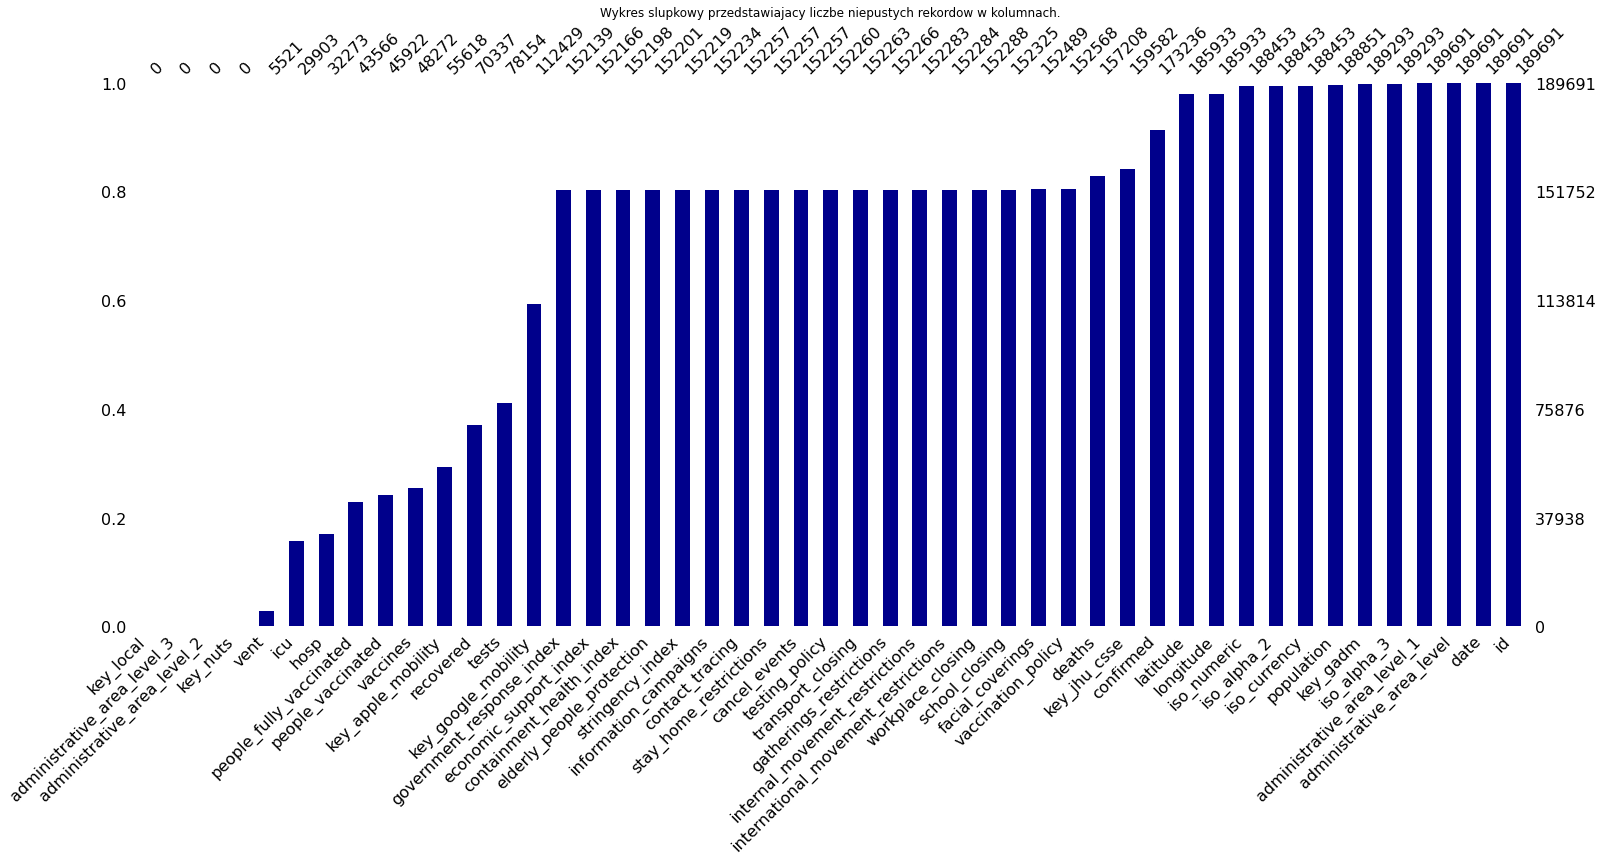

In [16]:
msno.bar(data, color = 'darkblue', sort = 'ascending')
plt.title('Wykres slupkowy przedstawiajacy liczbe niepustych rekordow w kolumnach.')

#### <h4> 1.6.2 Dolnotrojkatna macierz korelacji brakujacych wartosci. </h4>

Text(0.5, 1.0, 'Korelacja pomiedzy liczba brakujacych danych w roznych kolumnach')

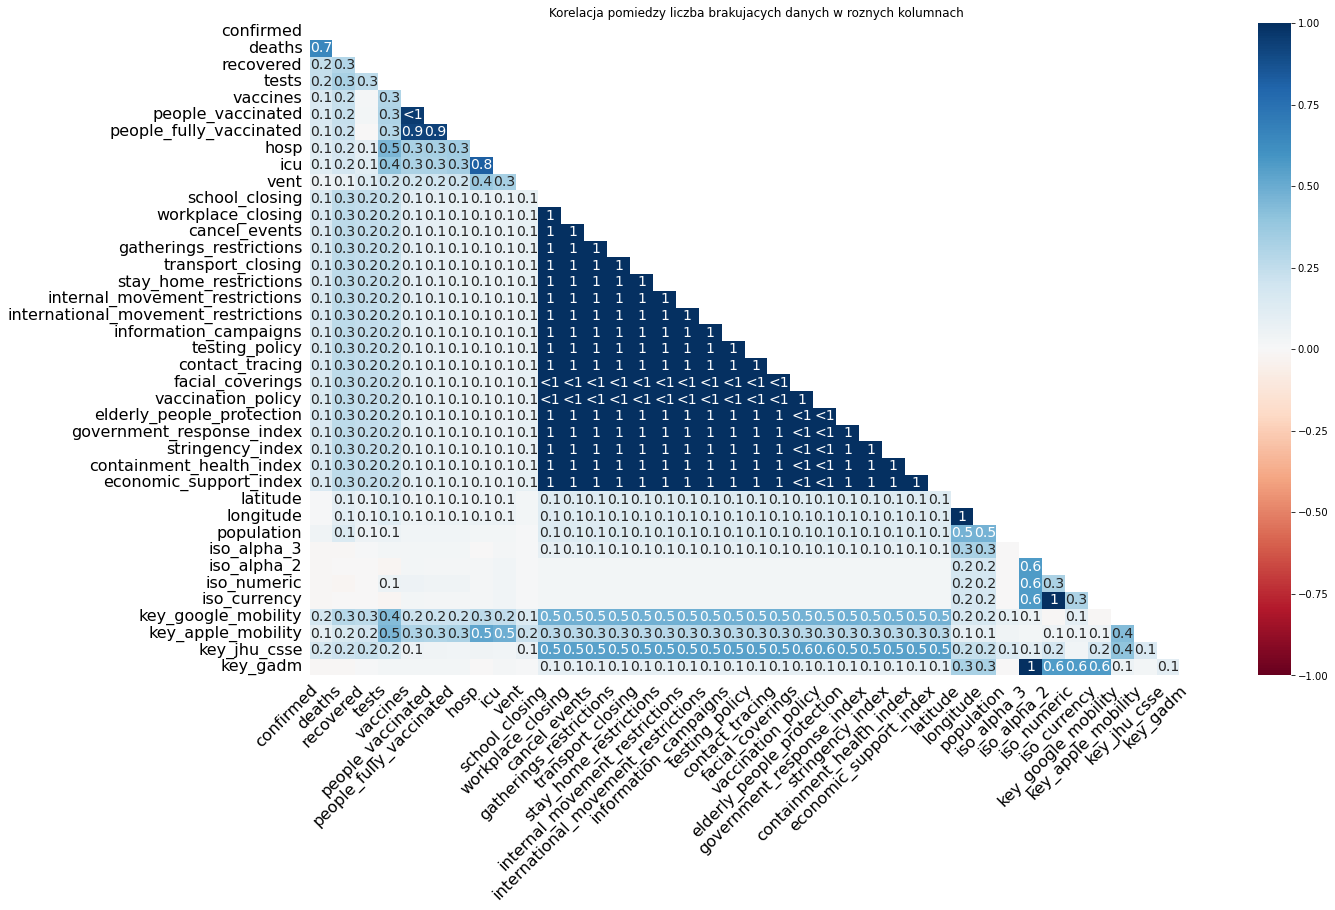

In [17]:
msno.heatmap(data)
plt.title('Korelacja pomiedzy liczba brakujacych danych w roznych kolumnach')

Na podstawie powyzszych badan widzimy 100% braki w danych dla kolumn **key_local, administrative_area_level_3, administrative_area_level_2 oraz key_nuts.** Mysle, ze mozemy podjac decyzje o ich **usunieciu bez poglebionej analizy ze wzgledu na niski wklad w nasze modele** - kolumny dotycza raczej identyfikatorow obszarow administracyjnych i nie beda uzyteczne w budowie modeli do predykcji smierci lub zakazen.

Powyzsze kolumny odrzucilem ze wzgledu na wysoka zawartosc brakow danych. Nastepnie usuwam pozostale zmienne "Administrative areas": administrative_area_level_1, administrative_area_level. Kolejne zmienne, ktore znikna z naszego datasetu sa to zmienne grupy ISO codes: iso_alpha_3, iso_numeric, iso_currency oraz cala grupa External Keys. Wymienione zmienne uwazam, ze maja niski wklad w predykcje liczby zgonow lub zachorowan - sa to zmienne jak np. waluty danego kraju, identyfikatory dla urzadzen firmy Apple lub z systemem Android, administracyjne zwiazane z regionem itd. **Wykonajmy wiec kopie danych z wydzielonymi juz kolumnami do dalszej pracy.**
### <h3> 1.7 Wybor danych do dalszych badan. </h3>

In [18]:
data_copy = data[list(data.columns[np.r_[:30, 34:36, 37]])]

print('Kolumny, ktore zostaly pozostawione do dalszej analizy: ')
data_copy.columns

Kolumny, ktore zostaly pozostawione do dalszej analizy: 


Index(['id', 'date', 'confirmed', 'deaths', 'recovered', 'tests', 'vaccines',
       'people_vaccinated', 'people_fully_vaccinated', 'hosp', 'icu', 'vent',
       'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'facial_coverings',
       'vaccination_policy', 'elderly_people_protection',
       'government_response_index', 'stringency_index',
       'containment_health_index', 'economic_support_index', 'latitude',
       'longitude', 'iso_alpha_3'],
      dtype='object')

In [19]:
data_copy.head(10).T

,131055,131056,131057,131058,131059,131060,131061,131062,131063,131064
id,0094b645,0094b645,0094b645,0094b645,0094b645,0094b645,0094b645,0094b645,0094b645,0094b645
date,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00
confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recovered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tests,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vaccines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
people_vaccinated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
people_fully_vaccinated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hosp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sprawdzmy, jak zmienil sie rozmiar naszych danych.

In [20]:
print(f'Ksztalt danych po zmianie: {data_copy.shape}, dlugosc: {len(data_copy)}, rozmiar: {data_copy.size}')
print(f'Ksztalt danych przed zmiana: {data.shape}, dlugosc: {len(data)}, rozmiar: {data.size}')
print(f'Usunelismy {47-33} kolumn, nasz zbior danych zmniejszyl sie o {(data.size - data_copy.size) / data.size * 100:.2f}%')

Ksztalt danych po zmianie: (189691, 33), dlugosc: 189691, rozmiar: 6259803
Ksztalt danych przed zmiana: (189691, 47), dlugosc: 189691, rozmiar: 8915477
Usunelismy 14 kolumn, nasz zbior danych zmniejszyl sie o 29.79%


Narysujmy teraz nasza macierz korelacji (dolnotrojkatna) dla nieoczyszczonego zbioru danych.

#### <h4> 1.8.1 Dolnotrojkatna macierz korelacji dla jeszcze nieoczyszczonego zbioru danych. </h4>

<AxesSubplot:>

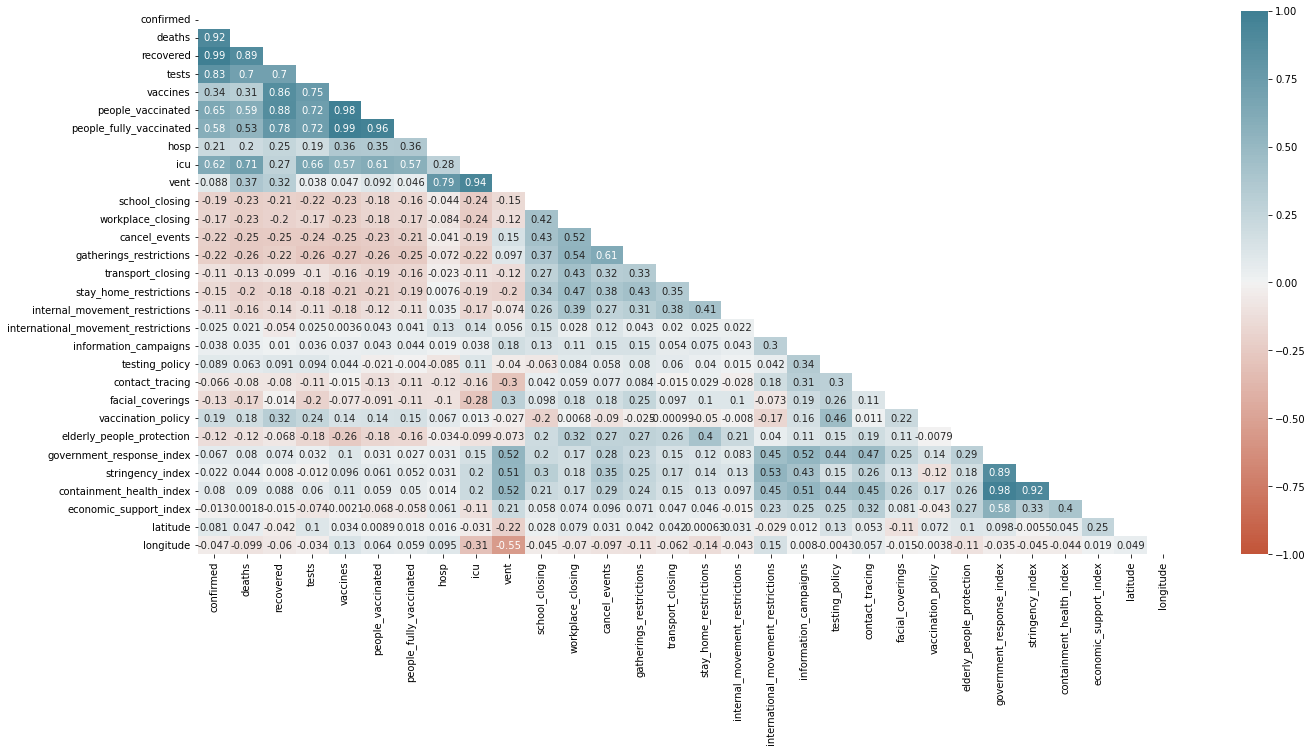

In [21]:
corr = data_copy.corr()

f, ax = plt.subplots(figsize=(22, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, cmap=sns.diverging_palette(20, 220, n=200), vmin = -1, vmax = 1, annot = True)

## <h2> 2. Czyszczenie i przygotowywanie zbioru danych do budowy modeli ML. </h2>
### <h3> 2.1 Wspolczynniki korelacji dla zmiennych dotyczacych smierci oraz potwierdzonych przypadkow zakazenia. </h3>

In [22]:
corr.sort_values('deaths', ascending = False)['deaths']

deaths                                 1.000000
confirmed                              0.915284
recovered                              0.888896
icu                                    0.710997
tests                                  0.704722
people_vaccinated                      0.592569
people_fully_vaccinated                0.532177
vent                                   0.372275
vaccines                               0.307929
hosp                                   0.197687
vaccination_policy                     0.181409
containment_health_index               0.089536
government_response_index              0.079538
testing_policy                         0.063171
latitude                               0.047005
stringency_index                       0.043756
information_campaigns                  0.034608
international_movement_restrictions    0.020874
economic_support_index                 0.001771
contact_tracing                       -0.080126
longitude                             -0

In [23]:
corr.sort_values('confirmed', ascending = False)['confirmed']

confirmed                              1.000000
recovered                              0.991493
deaths                                 0.915284
tests                                  0.826603
people_vaccinated                      0.646182
icu                                    0.619897
people_fully_vaccinated                0.583266
vaccines                               0.343888
hosp                                   0.213374
vaccination_policy                     0.193783
testing_policy                         0.089082
vent                                   0.087769
latitude                               0.081013
containment_health_index               0.079546
government_response_index              0.066975
information_campaigns                  0.038295
international_movement_restrictions    0.024768
stringency_index                       0.022244
economic_support_index                -0.012728
longitude                             -0.047129
contact_tracing                       -0

Na podstawie dotychczasowych rozwazan sprobujmy ostatecznie wybrac zmienne, ktorych bedziemy uzywac do budowy modeli. Odrzucam wszystkie zmienne dotyczace oceny prowadzonej polityki (np. government_response_index, transport_closing itd.) ze wzgledu na to, ze sa to zmienne dyskretne, ktore znalazlyby lepsze zastosowanie w klasyfikacji anizeli w modelach regresji. Pondato maja niskie wspolczynniki korelacji ze zmiennymi, ktore chcemy przewidywac. **Ostatecznie** do analizy pozostawiam zmienne: **confirmed, recovered, deaths, tests, people_vaccinated, people_fully_vaccinated, icu, hosp, vaccines, iso_alpha_3**, poniewaz sa to zmienne pandemiczne oraz maja stosunkowo wysokie wspolczynniki korelacji.
### <h3> 2.2 Wykonanie kopii danych, ktora zawiera wyselekcjonowane kolumny do dalszej analizy. </h3>

In [24]:
data_copy_1 = data_copy[['date', 'confirmed', 'recovered', 'deaths', 'tests', 'people_vaccinated', 'people_fully_vaccinated', 'icu', 'hosp', 'vaccines', 'iso_alpha_3']].reset_index(drop = True)

### <h3> 2.3 Dodanie pomocniczej kolumny zawierajacej miesiace. </h3>

In [25]:
data_copy_1['month'] = data_copy_1['date'].dt.to_period('M')
data_copy_1['month']

0         2020-01
1         2020-01
2         2020-01
3         2020-01
4         2020-01
           ...   
189686    2022-05
189687    2022-05
189688    2022-05
189689    2022-05
189690    2022-05
Name: month, Length: 189691, dtype: period[M]

### <h3> 2.4 Usuwanie brakow w danych. </h3>

In [26]:
print(f'Nasz zbior na moment przed czyszczeniem zawiera: {data_copy_1.isnull().sum().sum()} nulli.')

Nasz zbior na moment przed czyszczeniem zawiera: 1028746 nulli.


#### <h4> 2.4.1 Usuniecie danych sprzed marca 2020 roku oraz po maju 2022 roku. </h4>
Usuwamy dane z poczatku oraz konca naszego zbioru, poniewaz braki w tych przedzialach moga byc przypadkowe (niektore panstwa mogly zaczac raportowac, kiedy w innych pandemia jeszcze nie wystapila, a na koncu niektore dane mogly nie zostac jeszcze uzupelnione).

In [27]:
data_copy_1 = data_copy_1[(data_copy_1['month'] > '2020-03') & (data_copy_1['month'] < '2022-05')]

#### <h4> 2.4.2 Krotkie podsumowanie badanych danych - zgrupowane po panstwach. </h4>

In [28]:
nulls = data_copy_1.groupby('iso_alpha_3').count().rsub(data_copy_1.groupby('iso_alpha_3').size(), axis=0)
nulls['len'] = data_copy_1.groupby('iso_alpha_3').size()
nulls.insert(3, 'recovered_nulls [%]', round(nulls['recovered'] / nulls['len'] * 100, 2))
nulls.insert(2, 'confirmed_nulls [%]', round(nulls['confirmed'] / nulls['len'] * 100, 2))
nulls.sort_values('recovered_nulls [%]', ascending = False)

,date,confirmed,confirmed_nulls [%],recovered,recovered_nulls [%],deaths,tests,people_vaccinated,people_fully_vaccinated,icu,hosp,vaccines,month,len
iso_alpha_3,,,,,,,,,,,,,,
REU,0,42,5.53,760,100.0,0,42,270,270,0,0,270,0,760
COK,0,415,54.61,760,100.0,754,760,738,740,760,760,738,0,760
MTQ,0,42,5.53,760,100.0,0,42,270,270,0,0,270,0,760
MAC,0,760,100.00,760,100.0,760,760,495,497,760,760,450,0,760
GUF,0,42,5.53,760,100.0,0,42,270,270,0,0,270,0,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COL,0,0,0.00,0,0.0,0,122,406,406,628,628,382,0,628
CZE,0,0,0.00,0,0.0,0,0,270,270,0,0,270,0,760
BRA,0,0,0.00,0,0.0,0,25,291,310,760,760,291,0,760


Na podstawie powyzszego podsumowania danych mozemy zauwazyc bardzo ciekawa rzecz - panstwa, ktore maja wiele brakow dla cechy recovered czesto maja rowniez duze braki w innych kolumnach takich jak np. confirmed. Przykladem takiego panstwa jest np. Tonga, Tuvalu, Cook Islands. Czesto braki te oscyluja w graniach 100%, dlatego podejmuje decyzje o usunieciu takich panstw z naszych danych, poniewaz uzupelnianie tak duzej ilosci brakow danych byloby nierzetelne i zaburzaloby dzialanie modeli uczenia maszynowego.

In [29]:
countries_nulls_to_drop = (nulls[(nulls['recovered_nulls [%]'] > 80.0) & (nulls['confirmed_nulls [%]'] > 80.0)].index)
data_copy_1 = data_copy_1[~data_copy_1['iso_alpha_3'].isin(countries_nulls_to_drop)]
len(data_copy_1['iso_alpha_3'].unique())

225

W wyniku powyzszej operacji usunelismy 8 panstw, ktore mialy braki w kolumnach recovered oraz confirmed na poziomie ponad 80%.
#### <h4> 2.4.3 Pierwsza wizualizacja brakow w danych. </h4>

<AxesSubplot:>

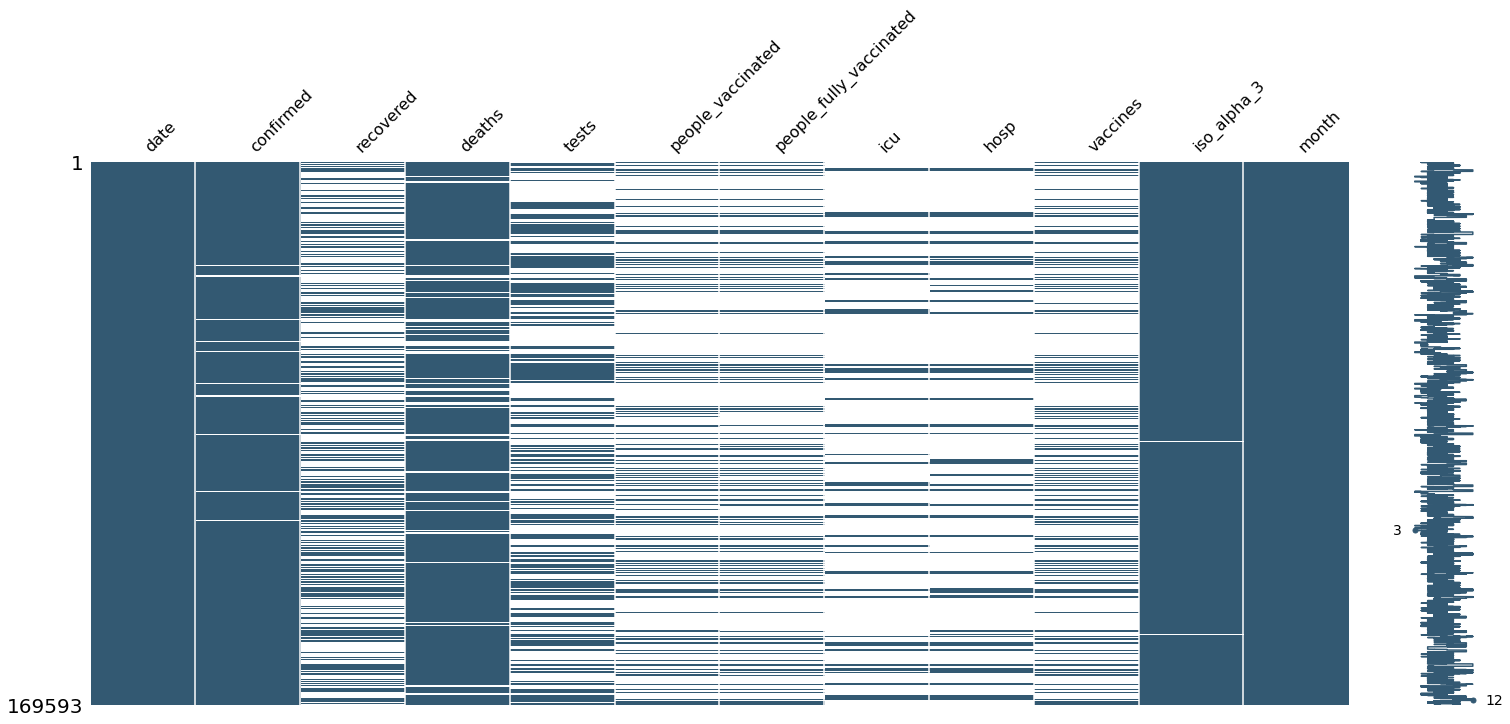

In [30]:
msno.matrix(data_copy_1, color = (0.2, 0.35, 0.45))

#### <h4> 2.4.4 Wypelnienie brakow danych dotyczacych szczepien za pomoca zer dla okresu sprzed marca 2021 roku, kiedy pojawily sie szczepionki. </h4>
Szczepionki pojawily sie w okolicy marca 2021 roku, dlatego braki w danych we wczesniejszym okresie wynikaja po prostu z ich braku dostepnosci dlatego decyzja o wypelnieniu zerami bedzie w porzadku.

In [31]:
data_copy_1[data_copy_1['month'] < '2021-03'] = data_copy_1[data_copy_1['month'] < '2021-03'].fillna({'people_vaccinated': 0, 'people_fully_vaccinated': 0, 'vaccines' : 0})

In [32]:
print(f'Liczba brakow danych po uzupelnieniu wybranych danych zerami: {data_copy_1.isna().sum().sum()}')

Liczba brakow danych po uzupelnieniu wybranych danych zerami: 656608


#### <h4> 2.4.5 Zastosowanie interpolacji. </h4>

In [33]:
import warnings
warnings.filterwarnings('ignore')

for country in data_copy_1['iso_alpha_3'].unique().astype(str):
    for feature in data_copy_1.columns[np.r_[1:10]]:
        data_copy_1[feature].loc[data_copy_1['iso_alpha_3'] == country] = data_copy_1[feature].loc[data_copy_1['iso_alpha_3'] == country].interpolate(method = 'linear')

In [34]:
print(f'Liczba brakow danych po zastosowaniu interpolacji: {data_copy_1.isna().sum().sum()}')

Liczba brakow danych po zastosowaniu interpolacji: 381580


#### <h4> 2.4.6 Druga wizualizacja brakow w danych - po uzyciu interpolacji. </h4>

<AxesSubplot:>

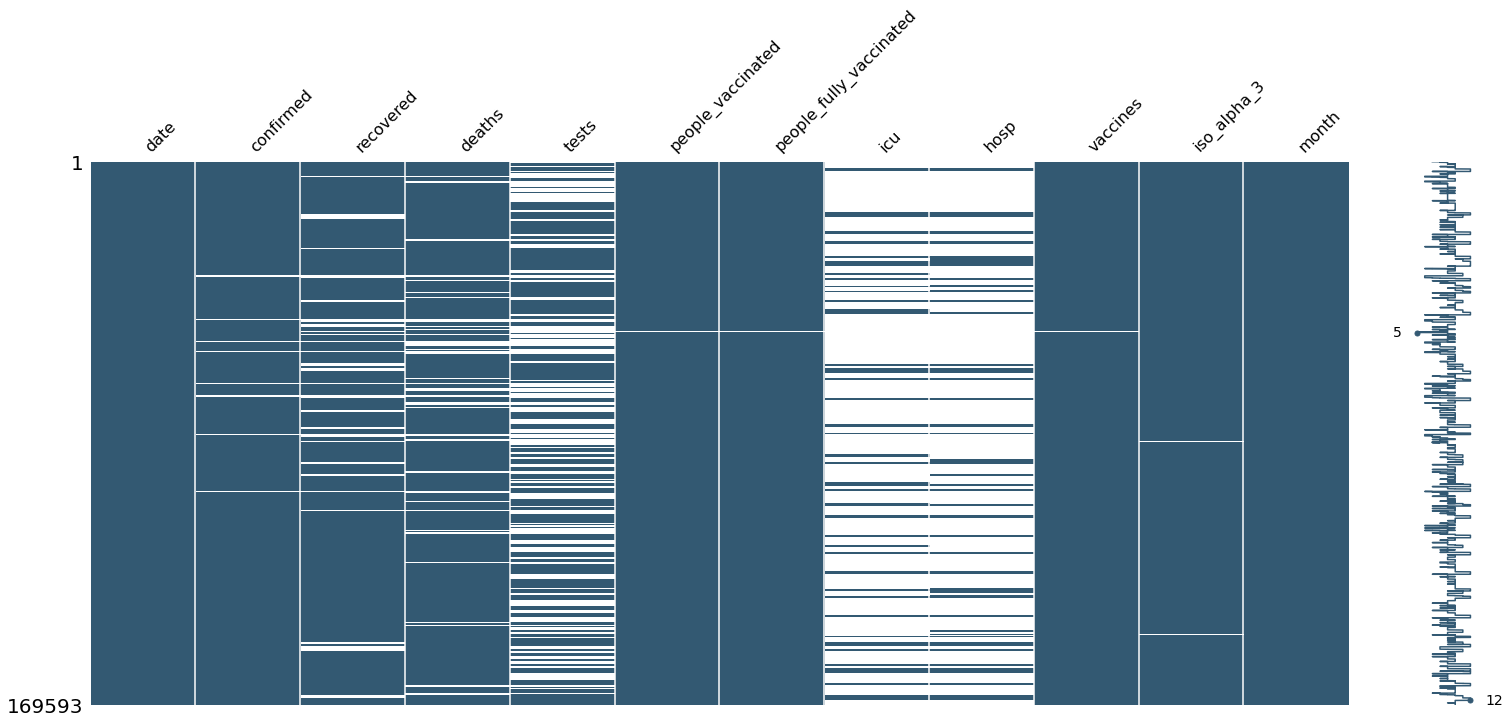

In [35]:
msno.matrix(data_copy_1, color = (0.2, 0.35, 0.45))

#### <h4> 2.4.7 Wypelnienie czesci pozostalych brakow danych za pomoca przesuwajacej sie sredniej dla kazdego panstwa w oknie o rozmiarze 10.</h4>

In [36]:
data_copy_1 = data_copy_1.groupby('iso_alpha_3').apply(lambda x: x.fillna(x.rolling(10, min_periods = 1).mean()))

In [37]:
print(f'Liczba brakow danych po zastosowaniu moving-average: {data_copy_1.isna().sum().sum()}')

Liczba brakow danych po zastosowaniu moving-average: 380134


#### <h4> 2.4.8 Uzycie sredniej oraz lewostronnego zlaczenia w celu wypelnienia pozostalych brakow w danych.</h4>

In [38]:
data_copy_1.fillna(data_copy_1[['month']].merge(data_copy_1.groupby('month').mean().reset_index(), on = 'month', how = 'left'), inplace = True)

In [39]:
print(f'Liczba brakow danych po zastosowaniu sredniej i lewostronnego zlaczenia: {data_copy_1.isna().sum().sum()}')

Liczba brakow danych po zastosowaniu sredniej i lewostronnego zlaczenia: 36591


#### <h4> 2.4.9 Trzecia wizualizacja brakow w danych - po uzyciu sredniej. </h4>

<AxesSubplot:>

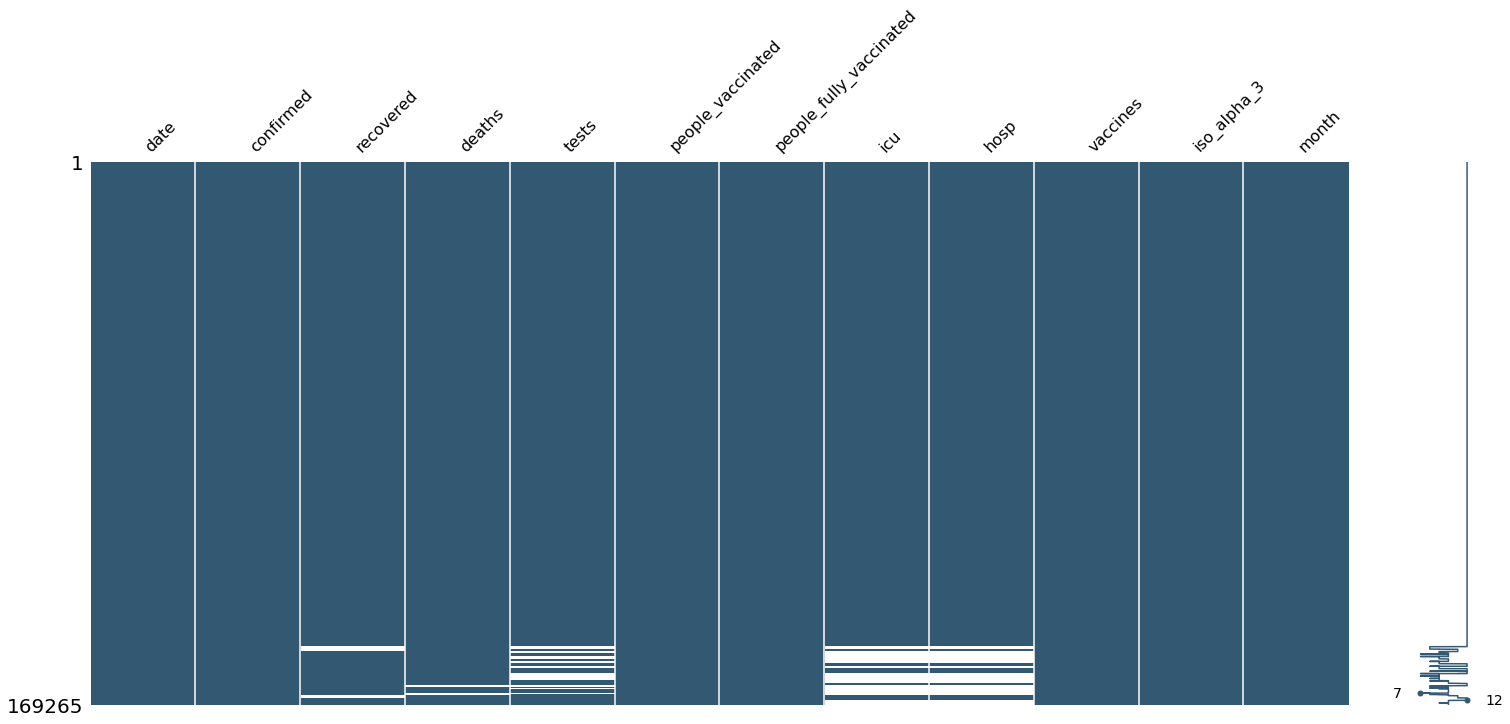

In [40]:
msno.matrix(data_copy_1, color = (0.2, 0.35, 0.45))

#### <h4> 2.4.10 Usuniecie pozostalych brakow w danych za pomoca dropna(). </h4>

In [41]:
print(f'Pozostale braki w danych stanowia: {round(data_copy_1.isnull().sum().sum() / data_copy_1.size * 100, 2)}% dlatego mozemy je usunac bez wiekszej straty.')

Pozostale braki w danych stanowia: 1.8% dlatego mozemy je usunac bez wiekszej straty.


In [42]:
data_copy_1.dropna(inplace = True)
data_copy_1.isna().sum().sum()

0

### <h3> 2.5 Zgrupowanie danych po dacie (dla kazdego dnia) oraz usrednienie wartosci, ktore wykorzystamy do budowy modeli.</h3>

In [43]:
data_grouped = data_copy_1.groupby(['date']).mean().reset_index()

#### <h4> 2.5.1 Wizualizacja rezultatow uzupelniania brakow w danych. </h4>

In [44]:
def plot_grupped_data(data: pd.DataFrame, date: str, feature: str, title: str) -> None:
    plt.figure(figsize=(20,10), dpi=65)
    plt.scatter(data[date], data[feature], color = 'black', s = 6, alpha = 0.3)
    plt.xlabel(date)
    plt.ylabel(feature)
    plt.title(title, fontsize = 18)
    plt.grid(visible=True, which='major', axis='both', linewidth=1, alpha=0.3)
    plt.show()

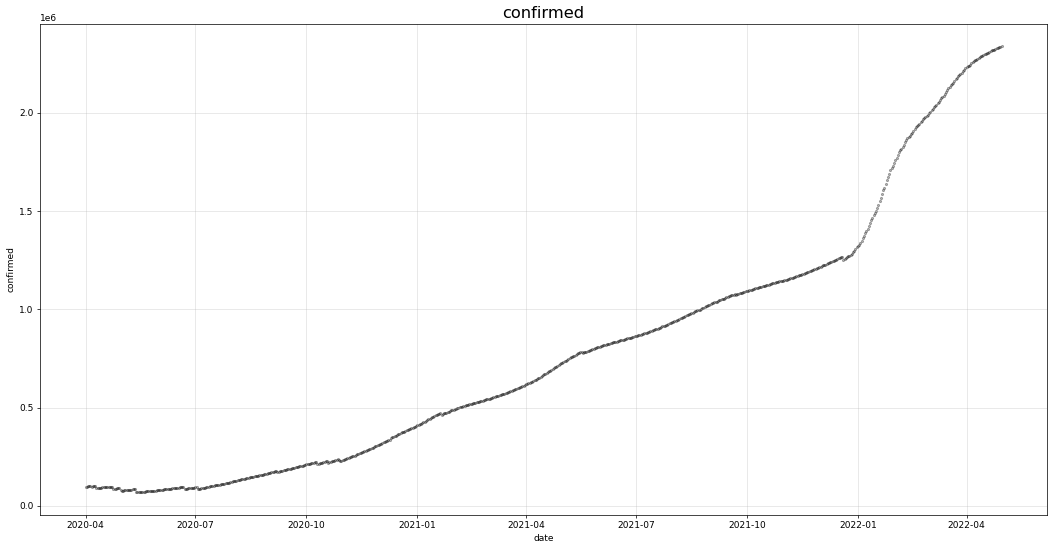

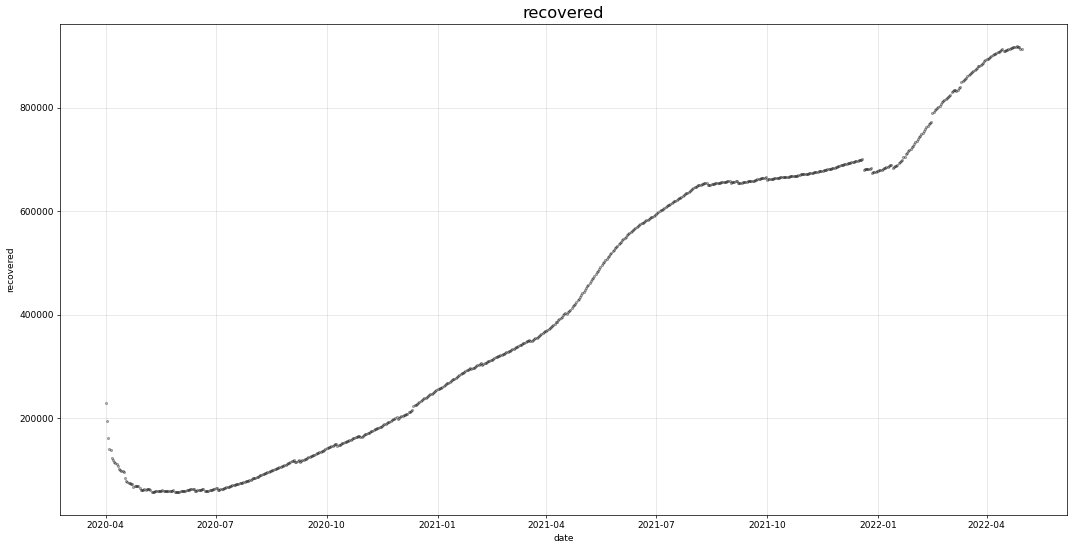

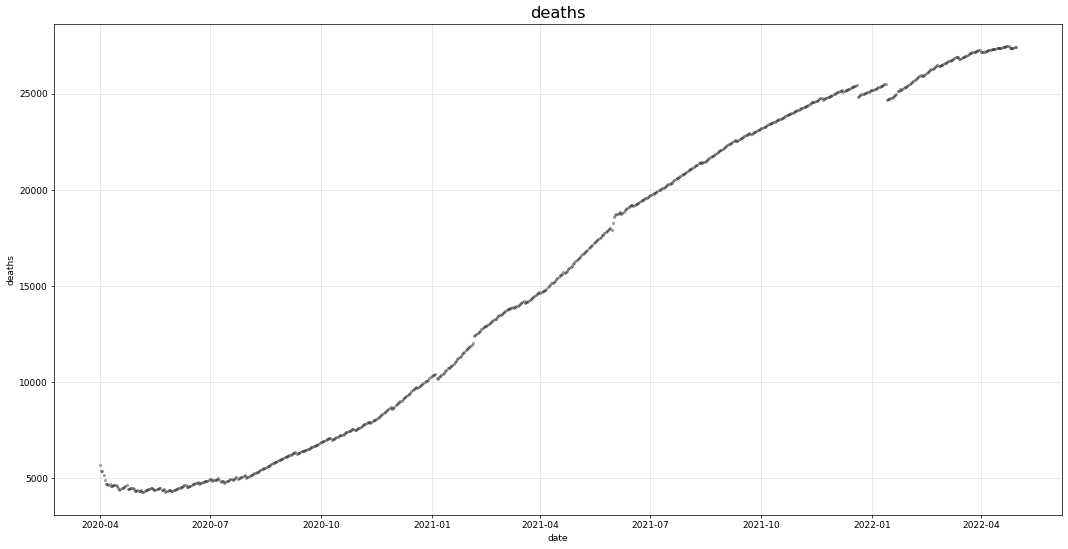

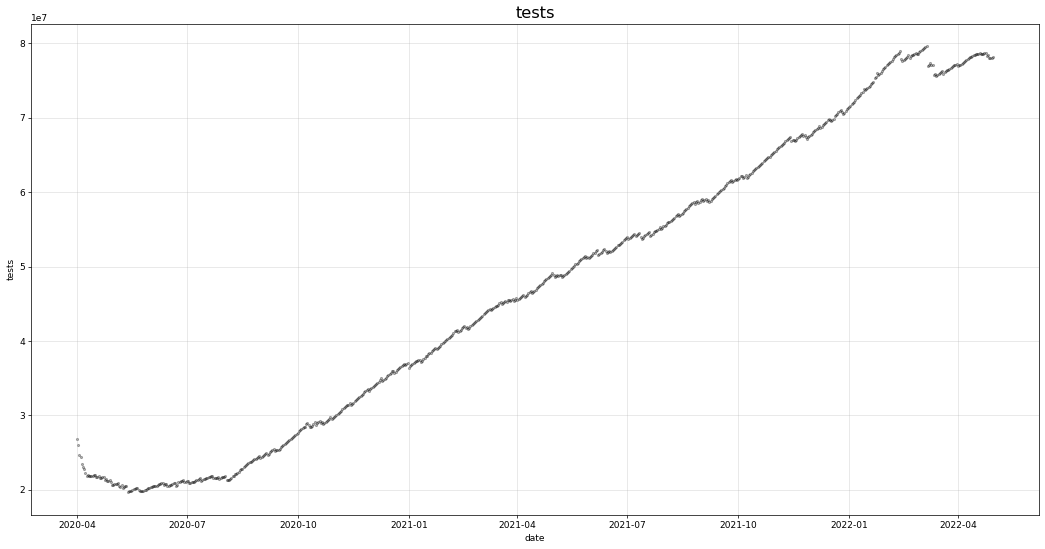

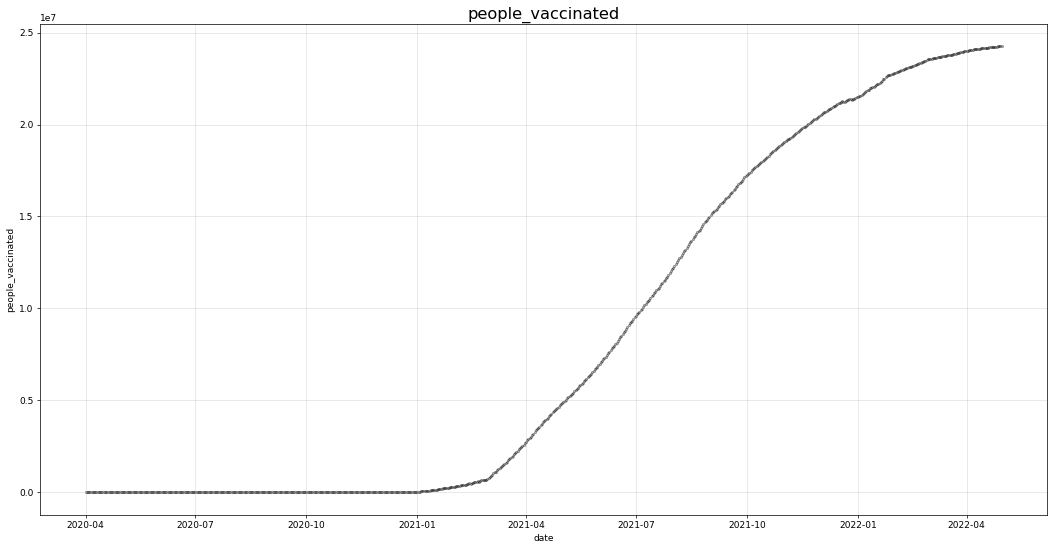

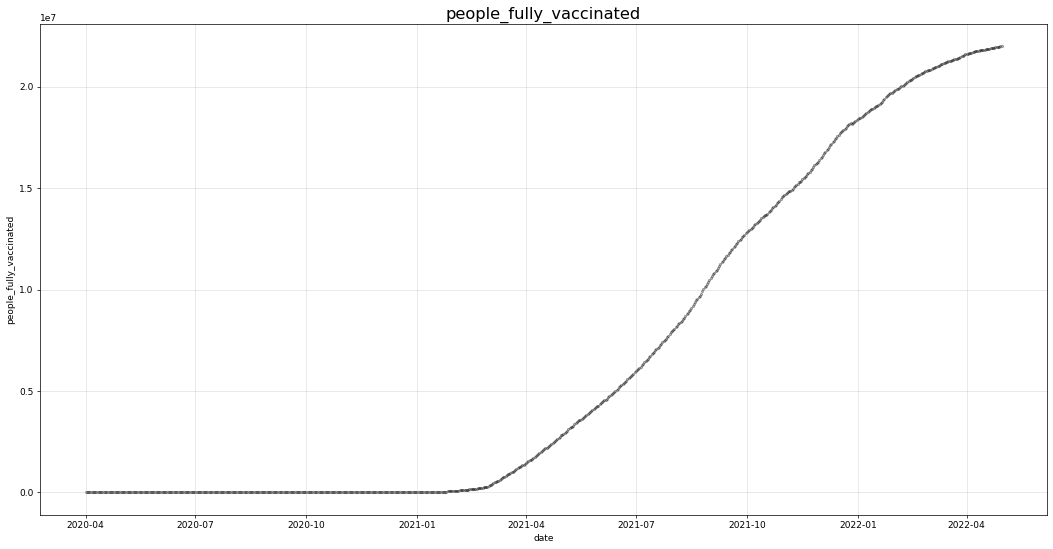

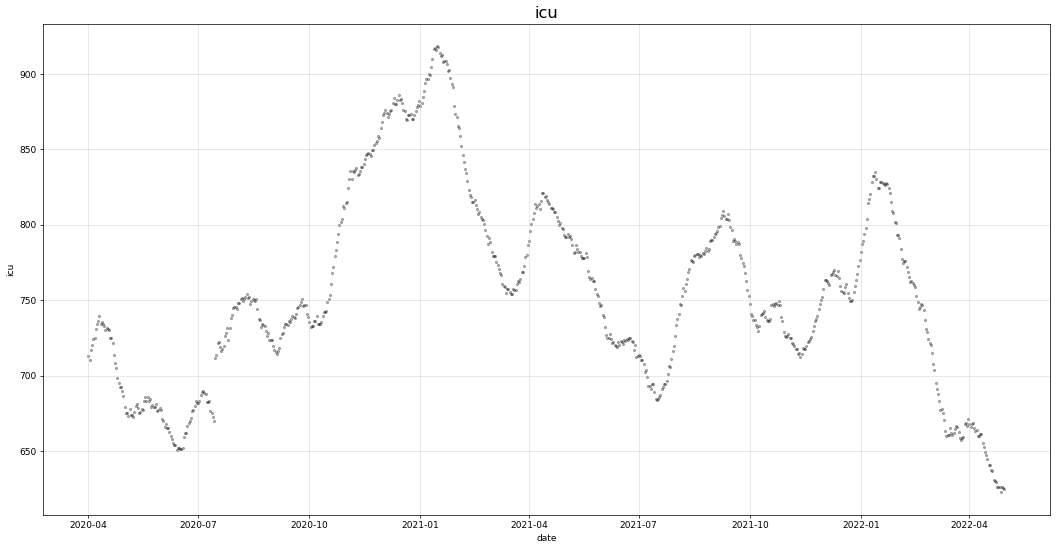

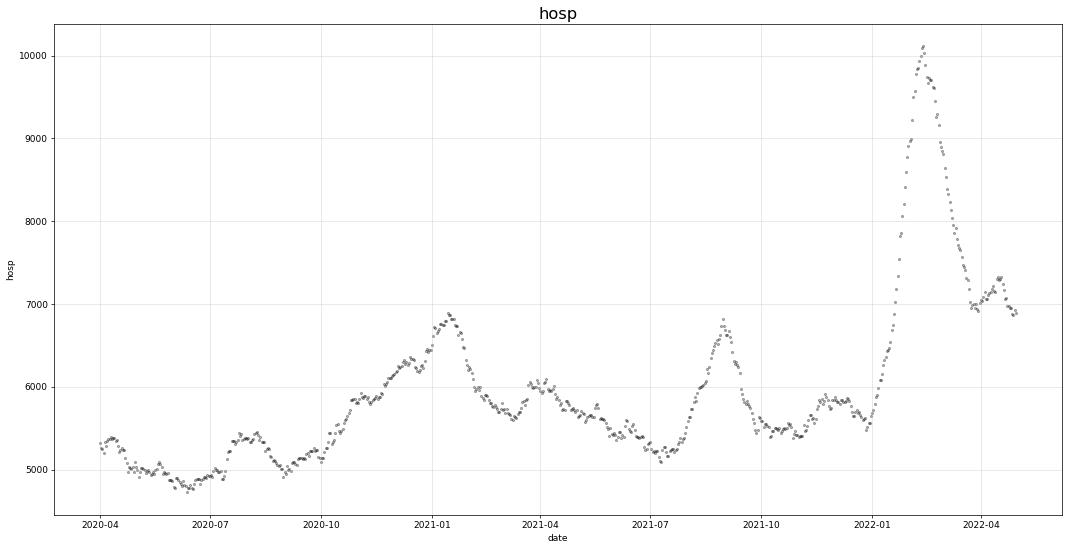

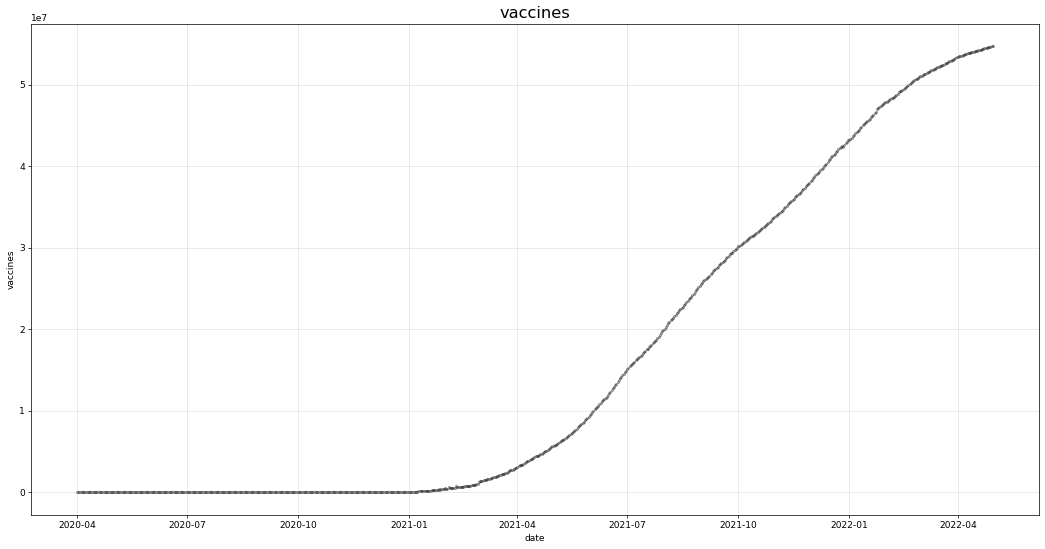

In [45]:
for i in data_grouped.columns[np.r_[1:10]]:
    plot_grupped_data(data_grouped, 'date', i, i)

Na podstawie powyzszych wykresow mozemy powiedziec, ze **proces uzupelniania brakow przebiegl pomyslnie.** Kolumny, w ktorych wystepowaly duze braki danych (np. te zwiazane ze szczepionkami) **zdaja sie odzwierciedlac faktyczny przebieg i wzrost podczas pandemii.** Na poczatku szczepionek nie ma w ogole, nastepnie w okolicy marca/kwietnia 2021 nastepuje gwaltowny wzrost i mniej wiecej rok pozniej trend ten zaczyna sie wyplaszczac (wiekszosc ludzi zaszczepila sie albo nie jest juz zainteresowana przyjeciem nastepnych dawek szczepionki).
#### <h4> 2.5.2 Dolnotrojkatna macierz korelacji zgrupowanych danych. </h4>

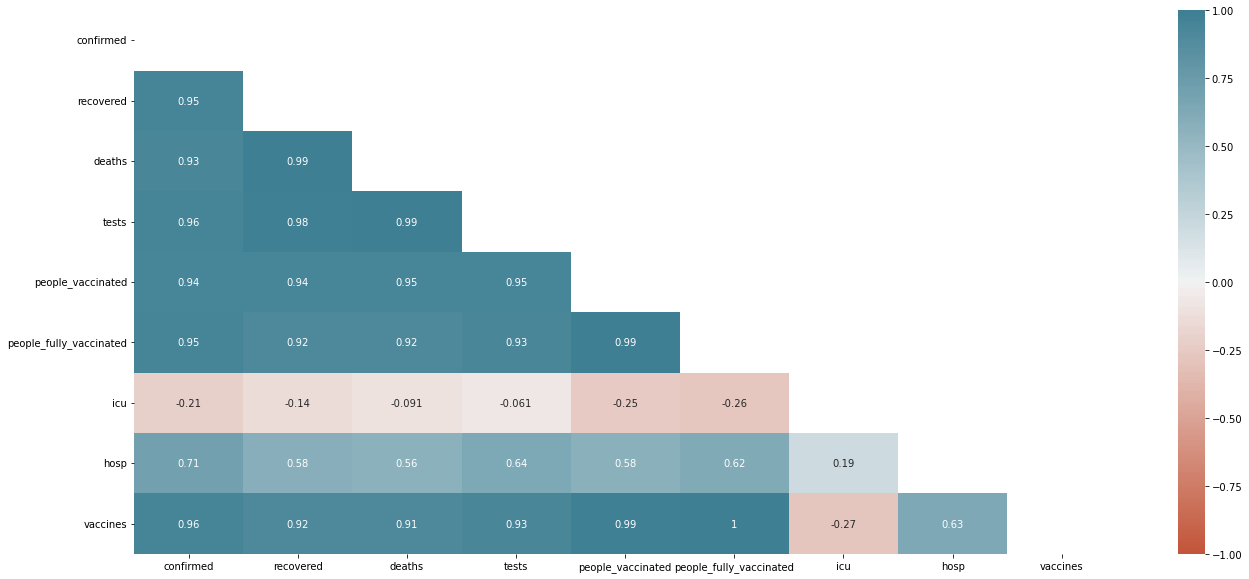

In [46]:
def plot_corr_heatmap(data_grouped: pd.DataFrame) -> None:
    corr = data_grouped.corr()

    f, ax = plt.subplots(figsize=(22, 10))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask = mask, cmap=sns.diverging_palette(20, 220, n=200), vmin = -1, vmax = 1, annot = True)

plot_corr_heatmap(data_grouped)

In [47]:
corr = data_grouped.corr()

## <h2> 3. Globalna predykcja liczby zachorowan. </h2>
### <h3> 3.1 Wyswietlenie wspolczynnikow korelacji dla cechy confirmed. </h3>

In [48]:
round(corr.sort_values('confirmed', ascending = False)['confirmed'], 2)

confirmed                  1.00
tests                      0.96
vaccines                   0.96
recovered                  0.95
people_fully_vaccinated    0.95
people_vaccinated          0.94
deaths                     0.93
hosp                       0.71
icu                       -0.21
Name: confirmed, dtype: float64

Najwyzszy wspolczynnik korelacji wystepuje dla zmiennej tests, wynosi on 0.97. Spojrzmy tez na zmienne, w ktorych byly potezne braki a ktore udalo sie uzupelnic: people_vaccinated - 0.94, people_fully_vaccinated - 0.95. Zmienna icu ma bardzo niski wspolczynnik korelacji bliski zera, dlatego ja pominiemy. Przejdzmy do tworzenia modelu regresji liniowej.

### <h3> 3.2 Modele regresji liniowej. </h3>

In [49]:
X = data_grouped[['recovered', 'deaths', 'tests', 'people_vaccinated', 'hosp', 'people_fully_vaccinated', 'vaccines']]
y = data_grouped[['confirmed']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [50]:
def create_lm(X_train: pd.DataFrame, X_test: pd.DataFrame, y_train: pd.DataFrame, y_test: pd.DataFrame, columns: pd.core.indexes.base.Index, regressor: LinearRegression) -> dict:
    regressor_summary = {'column_used': [], 'r^2': [], 'rmse': []}
    for col in columns:
        regressor.fit(X_train[[col]], y_train)
        y_pred = regressor.predict(X_test[[col]])
        regressor_summary['column_used'].append(col)
        regressor_summary['r^2'].append(round(r2_score(y_test, y_pred), 2))
        regressor_summary['rmse'].append(round(mean_squared_error(y_test, y_pred), 2))

    return regressor_summary

regressor = LinearRegression()
output = create_lm(X_train, X_test, y_train, y_test, X.columns, regressor)
output_df = pd.DataFrame(output).sort_values('r^2', ascending = False)
output_df

,column_used,r^2,rmse
2,tests,0.92,3.448757e+10
6,vaccines,0.92,3.408018e+10
0,recovered,0.91,3.696817e+10
5,people_fully_vaccinated,0.91,3.828219e+10
3,people_vaccinated,0.89,4.611358e+10
1,deaths,0.87,5.181044e+10
4,hosp,0.53,1.942032e+11


**Najlepsze wyniki otrzymalismy dla zmiennej tests** - r2 na poziomie 0.92 oraz najnizsze rmse, dlatego ta zmienna wybieram jako najlepsza.

In [51]:
regressor.fit(X_train[['tests']], y_train)

linear_r2_train = regressor.score(X_train[['tests']], y_train)
linear_r2_test = regressor.score(X_test[['tests']], y_test)

print(f"Train score: {regressor.score(X_train[['tests']], y_train)*100:.2f}%\nTest score: {regressor.score(X_test[['tests']], y_test)*100:.2f}%")

Train score: 91.88%
Test score: 91.62%


#### <h4> 3.2.1 Wizualizacja metryk modeli regresji liniowej. </h4>

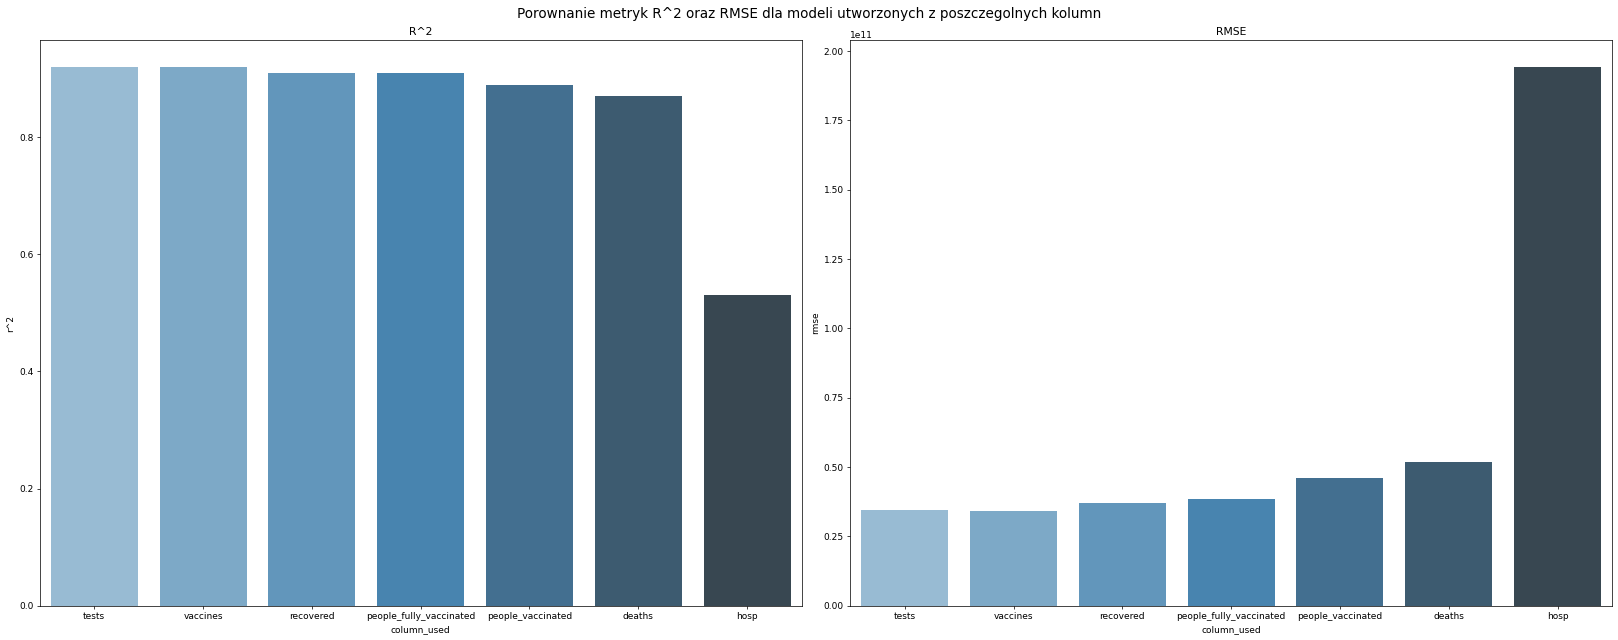

In [52]:
def metric_comparasion(output_df: pd.DataFrame) -> None:
    fig, ax = plt.subplots(1,2, figsize = (25, 10), dpi = 65)
    ax[0].set_title('R^2')
    sns.barplot(x = output_df['column_used'], y = output_df['r^2'], ci = None, ax = ax[0], palette="Blues_d")

    ax[1].set_title('RMSE')
    sns.barplot(x = output_df['column_used'], y = output_df['rmse'], ax = ax[1], palette="Blues_d")

    fig.suptitle('Porownanie metryk R^2 oraz RMSE dla modeli utworzonych z poszczegolnych kolumn', fontsize = 15)
    plt.rcParams['axes.grid'] = True
    plt.tight_layout()

metric_comparasion(output_df)

### <h3> 3.3 Sprawdzenie zalozen regresji liniowej dla zmiennej dajacej najlepsze metryki - tests. </h3>
#### <h4> 3.3.1 Obliczenie sredniej rezyduow. </h4>

In [53]:
regressor.fit(X_train[['tests']], y_train)
y_pred = regressor.predict(X_test[['tests']])
residuals = y_test - y_pred

print(f'Srednia rezyduow wynosi {np.mean(residuals.values):.2f}')

Srednia rezyduow wynosi 7634.47


#### <h4> 3.3.2 Sprawdzenie homoskedastycznosci. </h4>

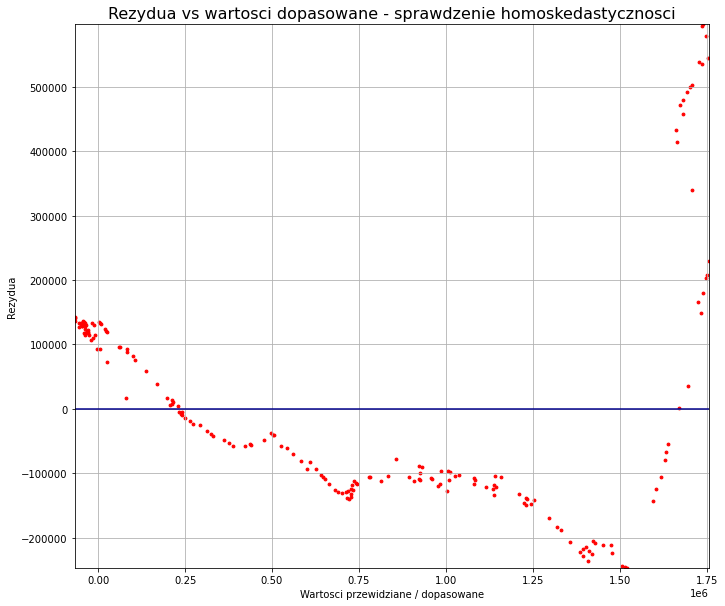

In [54]:
def homoscedasticity_check_plot(y_pred: np.ndarray, residuals: pd.DataFrame) -> None:
    plt.subplots(12, figsize = (25, 10))
    plt.subplot(121).scatter(y_pred, residuals.values, color = 'red', s = 8)
    plt.xlabel('Wartosci przewidziane / dopasowane')
    plt.ylabel('Rezydua')
    plt.ylim(residuals.values.min(), residuals.values.max())
    plt.xlim(y_pred.min(), y_pred.max())
    sns.lineplot(x = [y_pred.min(), y_pred.max()], y = [0, 0], color = 'darkblue')
    plt.title('Rezydua vs wartosci dopasowane - sprawdzenie homoskedastycznosci', fontsize = 16)

homoscedasticity_check_plot(y_pred, residuals)

Warunek homoskedastycznosci rezyduow nie jest spelniony - zdaje sie, ze problem ten powoduja w sporej mierze wartosci odstajace widoczne po prawej stronie wykresu. Srednia rezyduow jest na poziomie 7372.19 co nie jest wartoscia zla w stosunku do wielkosci na osi Y (setki tysiecy).
#### <h4> 3.3.3 Sprawdzenie, czy rezydua maja rozklad normalny. </h4>

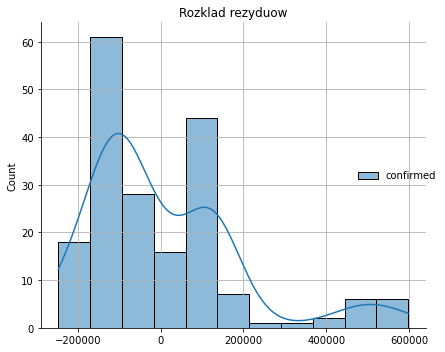

In [55]:
def normality_residuals_plot(residuals: pd.DataFrame) -> None:
    sns.displot(residuals, kde=True)
    plt.title('Rozklad rezyduow')
    plt.tight_layout()

normality_residuals_plot(residuals)

Rozklad rezyduow nie jest rozkladem normalnym - po raz koleny po prawej strony widzimy wplyw wartosci odstajacych.
#### <h4> 3.3.4 Sprawdzenie autokorelacji rezyduow. </h4>

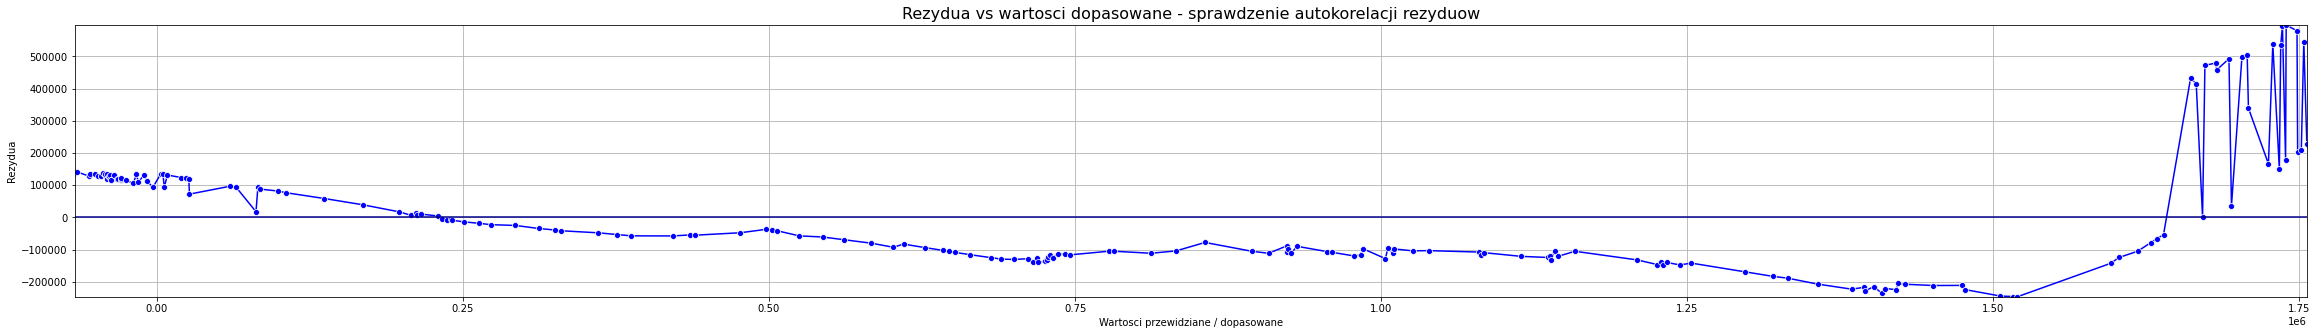

In [56]:
def residuals_autocorrelation_check_plot(y_pred: np.ndarray, residuals: pd.DataFrame) -> None:
    plt.figure(figsize=(40,5))
    sns.lineplot(x = np.ravel(y_pred), y = np.ravel(residuals.values), marker='o', color='blue')
    plt.xlabel('Wartosci przewidziane / dopasowane')
    plt.ylabel('Rezydua')
    plt.ylim(residuals.values.min(), residuals.values.max())
    plt.xlim(y_pred.min(), y_pred.max())
    sns.lineplot(x = [y_pred.min(), y_pred.max()], y = [0, 0], color = 'darkblue')
    plt.title('Rezydua vs wartosci dopasowane - sprawdzenie autokorelacji rezyduow', fontsize = 16)

residuals_autocorrelation_check_plot(y_pred, residuals)

Wykres nie jest szumem losowym, widzimy tutaj pewne trendy co moze wskazywac na autkorelacje rezyduow - jest to istotny problem naszego modelu prostej regresji liniowej.
#### <h4> 3.3.5 Sprawdzenie wspoliniowosci zmiennych. </h4>

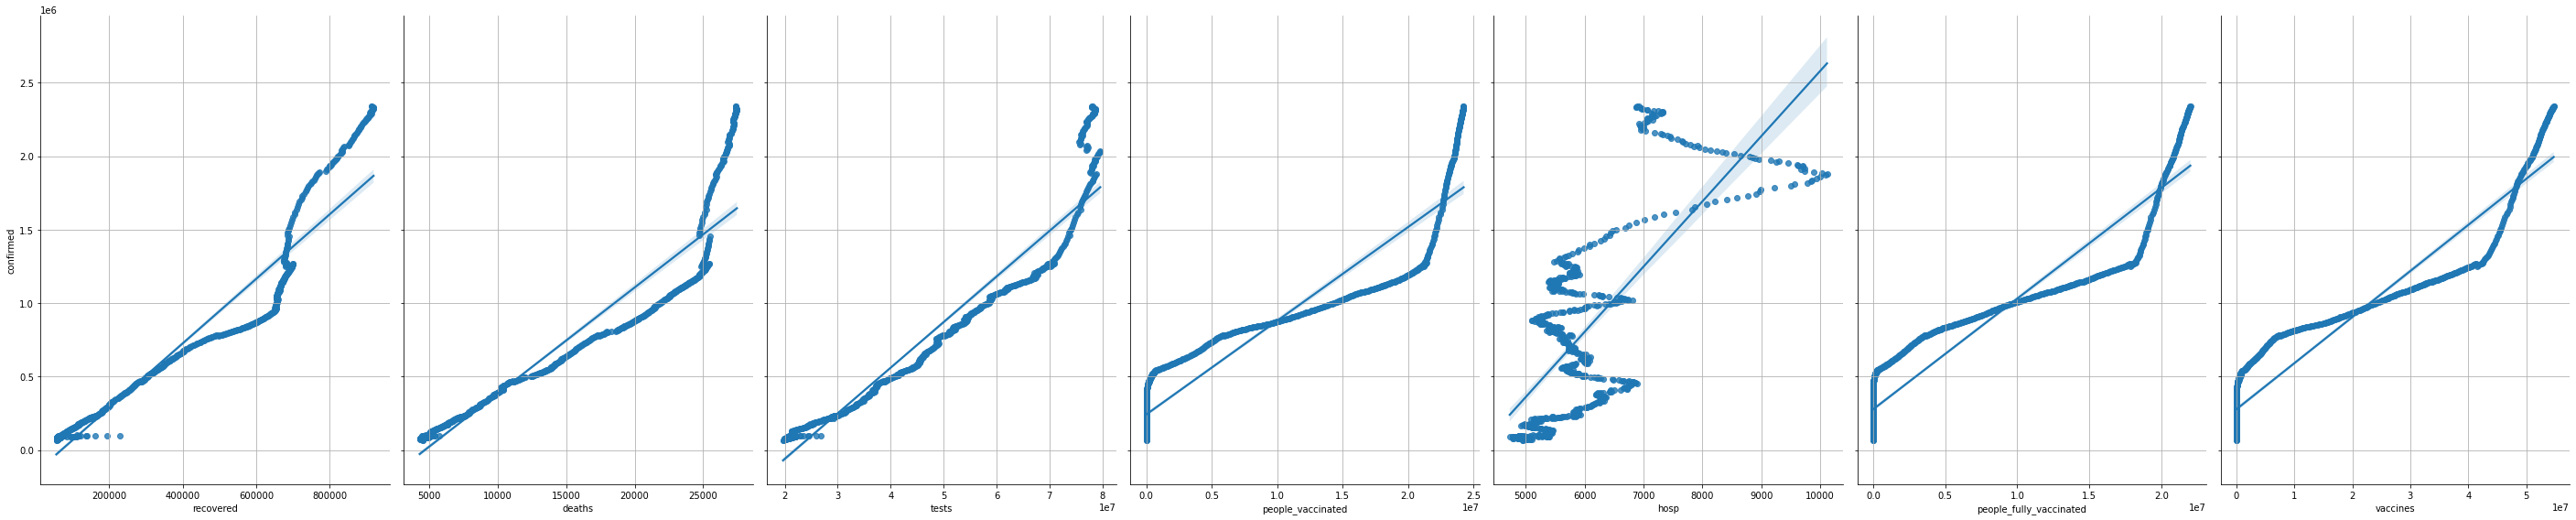

In [57]:
g = sns.PairGrid(data_grouped, x_vars = ['recovered', 'deaths', 'tests', 'people_vaccinated', 'hosp', 'people_fully_vaccinated', 'vaccines'], y_vars =['confirmed'], size = 8, aspect = 0.7)
g.map(sns.regplot)
plt.tight_layout()

Za wspoliniowe ze zmienna confirmed mozemy uznac zmienne recovered, deaths oraz tests. Pozostale niestety nie spelniaja tego warunku.
### <h3> 3.4 Wizualizacja dopasowania dla regresji liniowej. </h3>

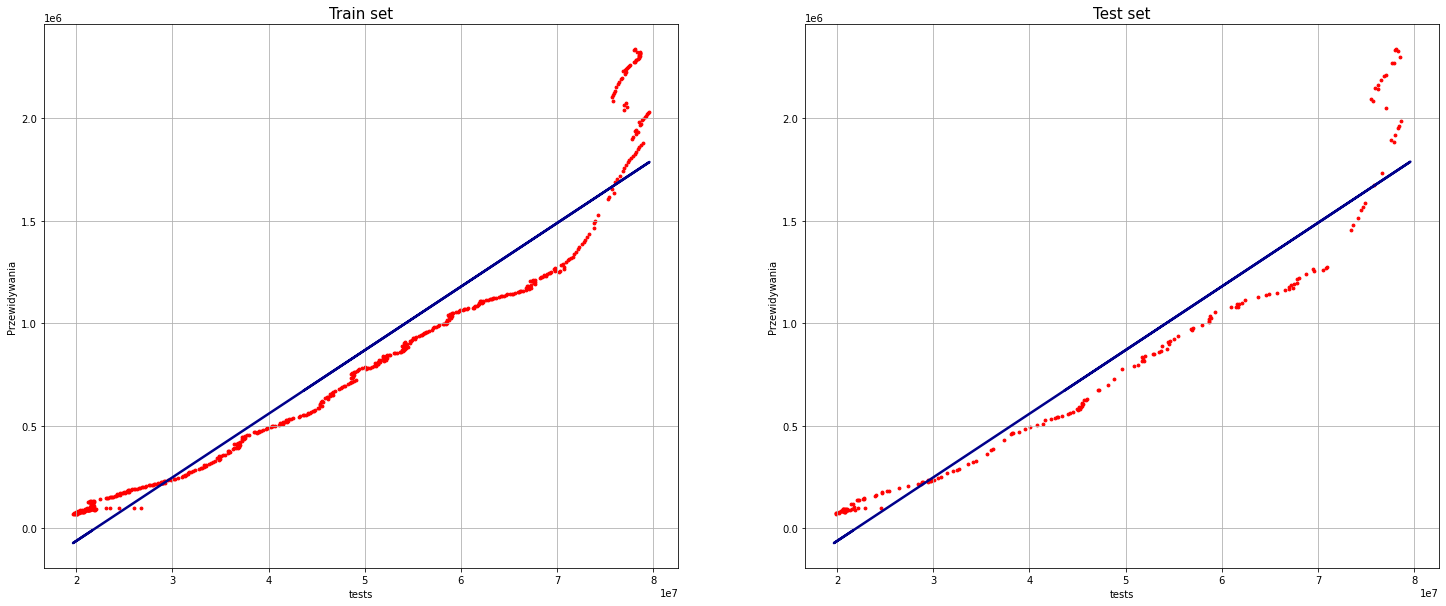

In [58]:
def linear_regression_visualization(X_train: pd.DataFrame, X_test: pd.DataFrame, y_train: pd.DataFrame, y_test: pd.DataFrame, regressor: LinearRegression(), predictor: str) -> None:
    plt.subplots(12, figsize = (25, 10))
    plt.subplot(121).scatter(X_train[[predictor]], y_train, color = 'red', s = 8)
    plt.plot(X_train[[predictor]], regressor.predict(X_train[[predictor]]), color = 'darkblue', linewidth = 2.5)
    plt.title('Train set', fontsize = 15)
    plt.xlabel(predictor)
    plt.ylabel('Przewidywania')

    plt.subplot(122).scatter(X_test[[predictor]], y_test, color = 'red', s = 8)
    plt.plot(X_train[[predictor]], regressor.predict(X_train[[predictor]]), color = 'darkblue', linewidth = 2.5)
    plt.title('Test set', fontsize = 15)
    plt.xlabel(predictor)
    plt.ylabel('Przewidywania')

linear_regression_visualization(X_train, X_test, y_train, y_test, regressor, 'tests')

#### <h4> 3.4.1 Sprawdzenie korelacji pomiedzy zmiennymi. </h4>

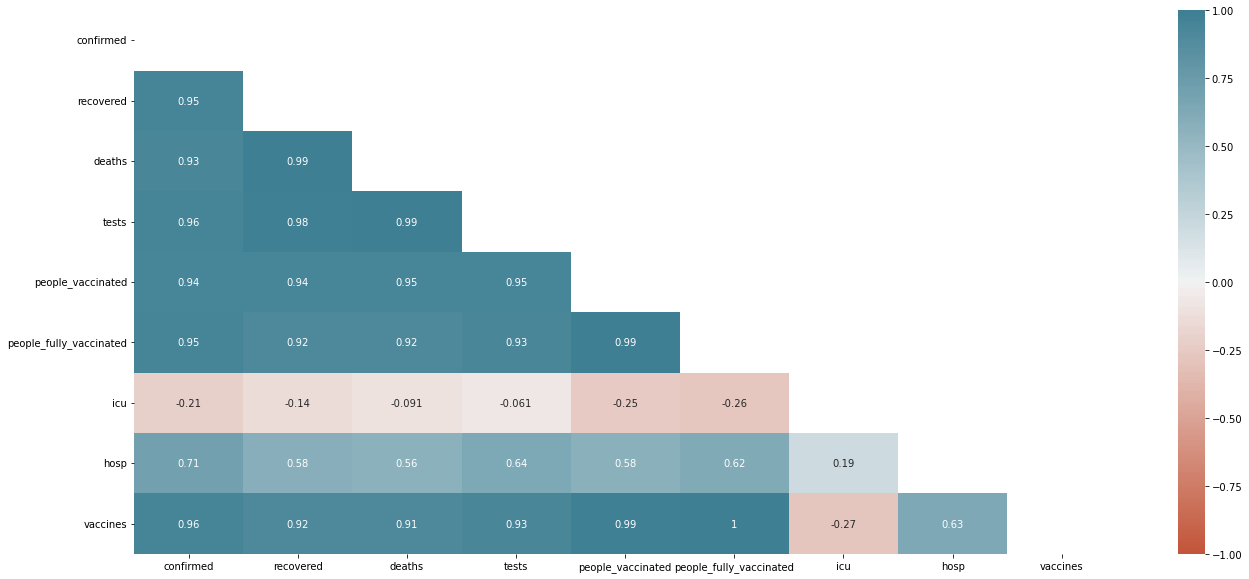

In [59]:
plot_corr_heatmap(data_grouped)

### <h3> 3.5 Model regresji wielorakiej. </h3>
Do regresji wielorakiej wybieram zmienne vaccines oraz tests. Zmienna deaths odrzucam ze wzgledu na ogromna korelacje pomiedzy recovered oraz tests. Warto nadmienic, ze mimo staran obecny wybor rowniez nie jest idealny, poniewaz pomiedzy vaccines a tests rowniez wystepuje silna korelacja natomiast ciezko podjac lepsza decyzje. Wszystkie zmienne sa ze soba silnie skorelowane lub nie sa wspoliniowe z przewidywana.

In [60]:
regressor = LinearRegression()
scaler = StandardScaler()

#standaryzacja danych - podobnie jak dla SVR
X_train_sc = scaler.fit_transform(X_train[['vaccines', 'tests']])
X_test_sc = scaler.transform(X_test[['vaccines', 'tests']])

regressor.fit(X_train_sc, y_train)
y_pred = regressor.predict(X_test_sc)

print(f'Wynik bledu R^2 dla modelu regresji wielorakiej to: {round(r2_score(y_test, y_pred), 2)}, RMSE: {round(mean_squared_error(y_test, y_pred), 2)}')

Wynik bledu R^2 dla modelu regresji wielorakiej to: 0.95, RMSE: 20125500461.1


#### <h4> 3.5.1 Porownanie wynikow modelu regresji liniowej oraz wielorakiej.

In [61]:
print(f"[REGRESJA WIELORAKA]:\nTrain score: {regressor.score(X_train_sc, y_train)*100:.2f}%\nTest score: {regressor.score(X_test_sc, y_test)*100:.2f}%\n")
print(f"[REGRESJA LINIOWA]:\nTrain score: {linear_r2_train * 100:.2f}%\nTest score: {linear_r2_test * 100:.2f}%\n")

[REGRESJA WIELORAKA]:
Train score: 94.88%
Test score: 95.11%

[REGRESJA LINIOWA]:
Train score: 91.88%
Test score: 91.62%



### <h3> 3.6 SVR. </h3>

In [62]:
def fit_predict_output(X_train: pd.DataFrame, X_test: pd.DataFrame, y_train: pd.DataFrame, y_test: pd.DataFrame, regressor: sklearn.base.RegressorMixin) -> None:
    if(str(regressor) == 'SVR()'):
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    regressor.fit(X_train, np.ravel(y_train))
    print(f"[{str(regressor).split('(')[0]}]:\nTrain score: {regressor.score(X_train, y_train)*100:.2f}%\nTest score: {regressor.score(X_test, y_test)*100:.2f}%\n")

fit_predict_output(X_train, X_test, y_train, y_test, SVR())

[SVR]:
Train score: -1.82%
Test score: -0.73%



### <h3> 3.7 DecisionTreeRegressor. </h3>

In [63]:
fit_predict_output(X_train, X_test, y_train, y_test, DecisionTreeRegressor())

[DecisionTreeRegressor]:
Train score: 100.00%
Test score: 99.98%



### <h3> 3.8 RandomForestRegressor. </h3>

In [64]:
fit_predict_output(X_train, X_test, y_train, y_test, RandomForestRegressor())

[RandomForestRegressor]:
Train score: 100.00%
Test score: 99.97%



## <h2> 4. Globalna predykcja liczby smierci spowodowanych choroba COVID-19. </h2>
### <h3> 4.1 Wyswietlenie wspolczynnikow korelacji dla cechy deaths. </h3>

In [65]:
round(corr.sort_values('deaths', ascending = False)['deaths'], 2)

deaths                     1.00
recovered                  0.99
tests                      0.99
people_vaccinated          0.95
confirmed                  0.93
people_fully_vaccinated    0.92
vaccines                   0.91
hosp                       0.56
icu                       -0.09
Name: deaths, dtype: float64

Najwyzszy wspolczynnik korelacji wystepuje dla zmiennej recovered i wynosi az 0.99. Podobna wartosc wystepuje dla zmiennej tests. Wysokie wartosci korelacji wystepuja rowniez dla zmiennych people_vaccinated, confirmed, people_fully_vaccinated, vaccines oraz hosp.

#### <h4> 4.2 Modele regresji liniowej. </h4>

In [66]:
X = data_grouped[['confirmed', 'recovered', 'tests', 'people_vaccinated', 'people_fully_vaccinated', 'vaccines', 'hosp']]
y = data_grouped[['deaths']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [67]:
regressor = LinearRegression()
output = create_lm(X_train, X_test, y_train, y_test, X.columns, regressor)
output_df = pd.DataFrame(output).sort_values('r^2', ascending = False)
output_df

,column_used,r^2,rmse
1,recovered,0.99,967038.55
2,tests,0.98,1106505.94
3,people_vaccinated,0.89,7668940.78
0,confirmed,0.87,8685458.56
4,people_fully_vaccinated,0.83,11394660.07
5,vaccines,0.83,11723197.73
6,hosp,0.35,44519632.19


Najlepsze wyniki otrzymalismy dla zmiennej recovered - R^2 na poziomie 0.99 oraz najnizsze RMSE. Co ciekawe podobny blad R^2 zostal obliczony dla zmiennej tests, natomiast mamy zauwazalnie wyzsze RMSE dlatego jako najlepiej rokujaca zmienna wybieram recovered.

In [68]:
regressor.fit(X_train[['recovered']], y_train)

linear_r2_train = regressor.score(X_train[['recovered']], y_train)
linear_r2_test = regressor.score(X_test[['recovered']], y_test)

print(f"Train score: {regressor.score(X_train[['recovered']], y_train)*100:.2f}%\nTest score: {regressor.score(X_test[['recovered']], y_test)*100:.2f}%")

Train score: 98.47%
Test score: 98.60%


#### <h4> 4.2.1 Wizualizacja metryk modeli regresji liniowej. </h4>

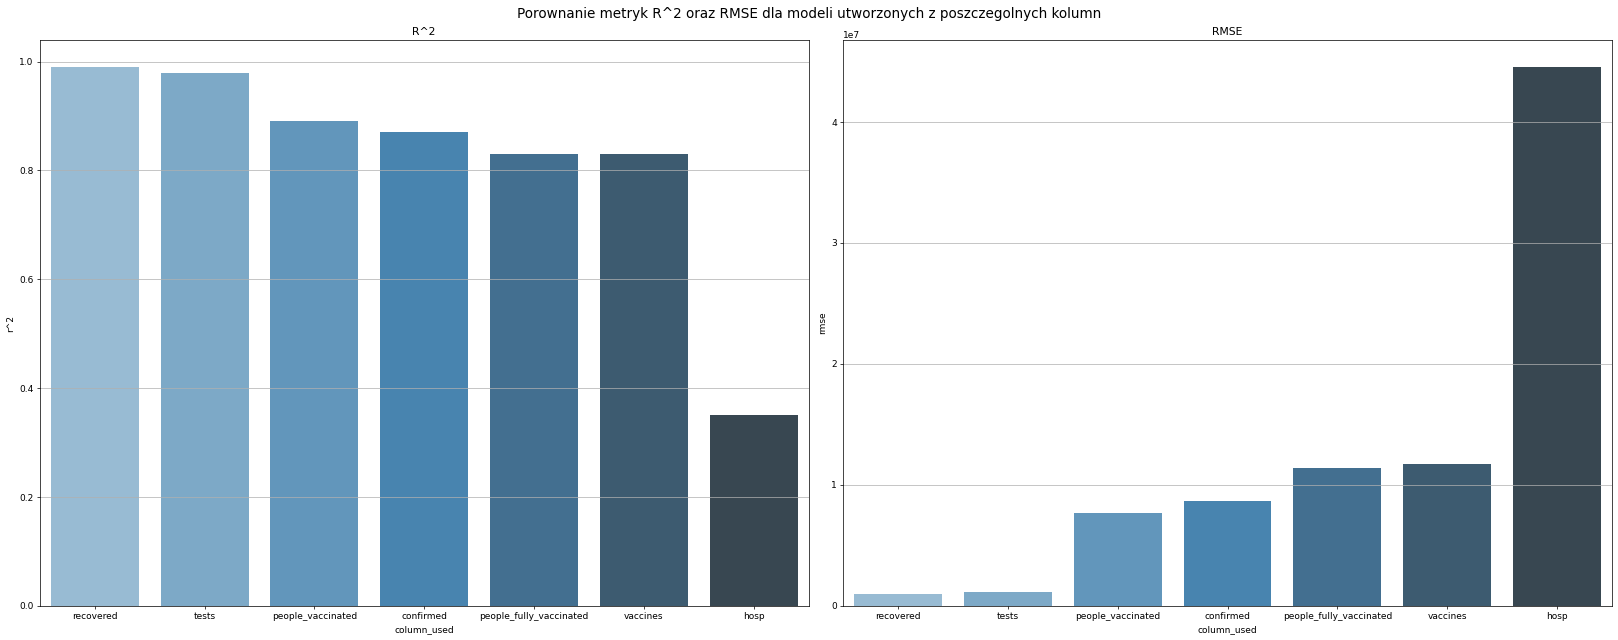

In [69]:
metric_comparasion(output_df)

### <h3> 4.3 Sprawdzenie zalozen regresji liniowej dla zmiennej dajacej najlepsze metryki - recovered. </h3>
#### <h4> 4.3.1 Obliczenie sredniej rezyduow. </h4>

In [70]:
regressor.fit(X_train[['recovered']], y_train)
y_pred = regressor.predict(X_test[['recovered']])
residuals = y_test - y_pred

print(f'Srednia rezyduow wynosi {np.mean(residuals.values):.2f}')

Srednia rezyduow wynosi 15.53


#### <h4> 4.3.2 Sprawdzenie homoskedastycznosci. </h4>

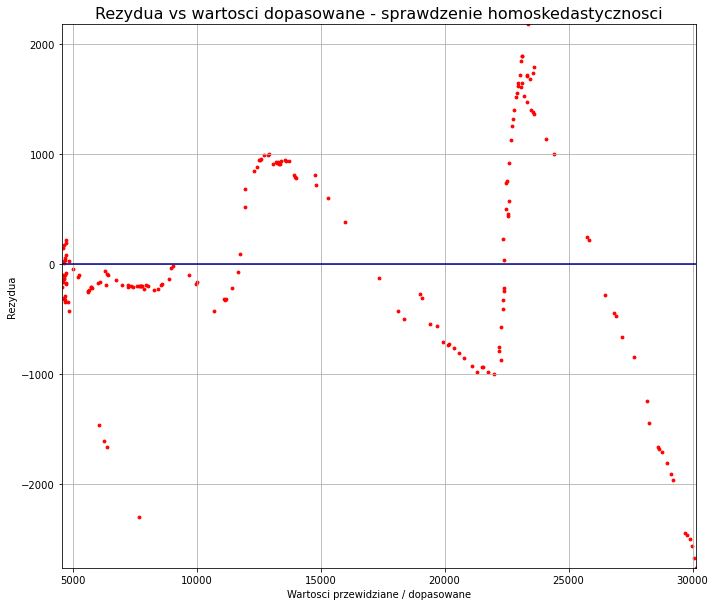

In [71]:
homoscedasticity_check_plot(y_pred, residuals)

Warunek homoskedastycznosci nie wydaje sie byc spelniony, podobnie jak dla przewidywan confirmed prawa strona wydaje sie byc wyraznie odstajaca. Natomiast bardzo ciekawa jest tutaj srednia rezyduow na poziomie 15.53 - biorac pod uwage skale osi pionowej jest ona prawie rowna 0.
#### <h4> 4.3.3 Sprawdzenie, czy rezydua maja rozklad normalny. </h4>

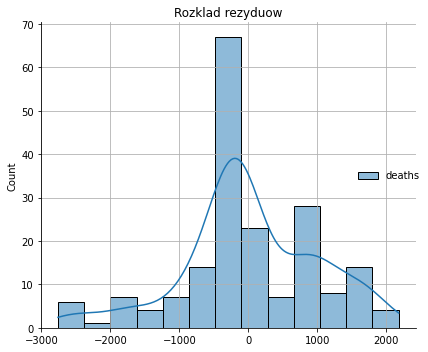

In [72]:
normality_residuals_plot(residuals)

Rozklad rezyduow nieco przypomina rozklad normalny, natomiast jego prawa strona wydaje sie byc "zaburzona".
### <h4> 4.3.4 Sprawdzenie autokorelacji rezyduow. </h4>

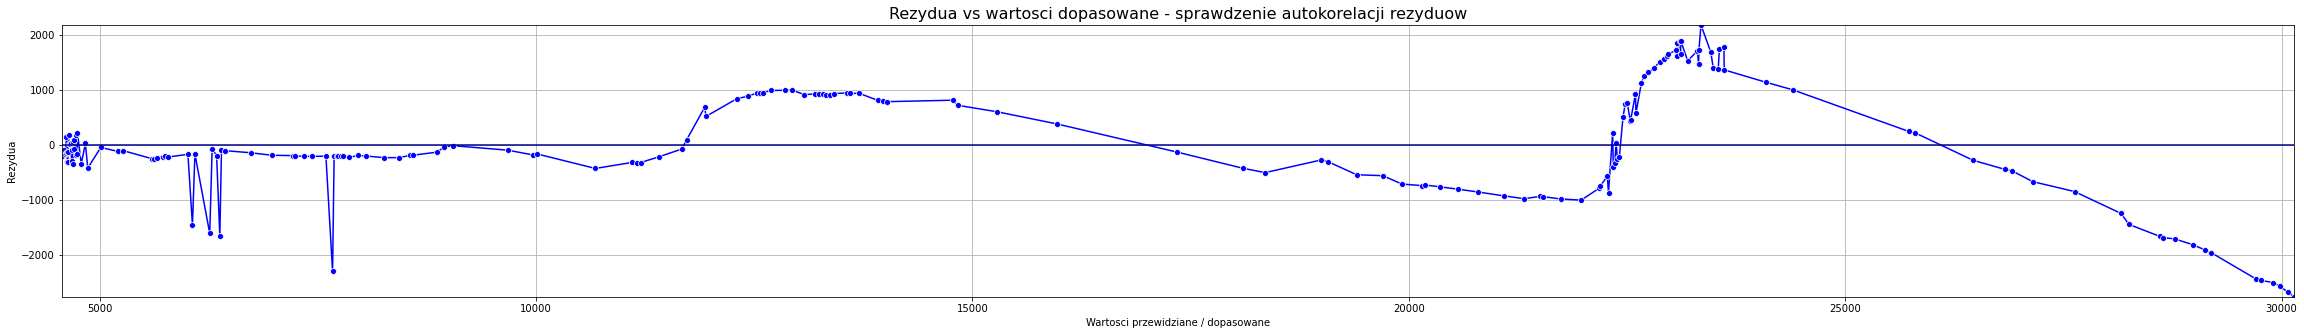

In [73]:
residuals_autocorrelation_check_plot(y_pred, residuals)

Widzimy pewne trendy, wiec mamy podstawy aby sadzic, ze wystepuje tutaj autokorelacja rezyduow, co jest sporym minusem naszego modelu.
#### <h4> 4.3.5 Sprawdzenie wspoliniowosci zmiennych. </h4>

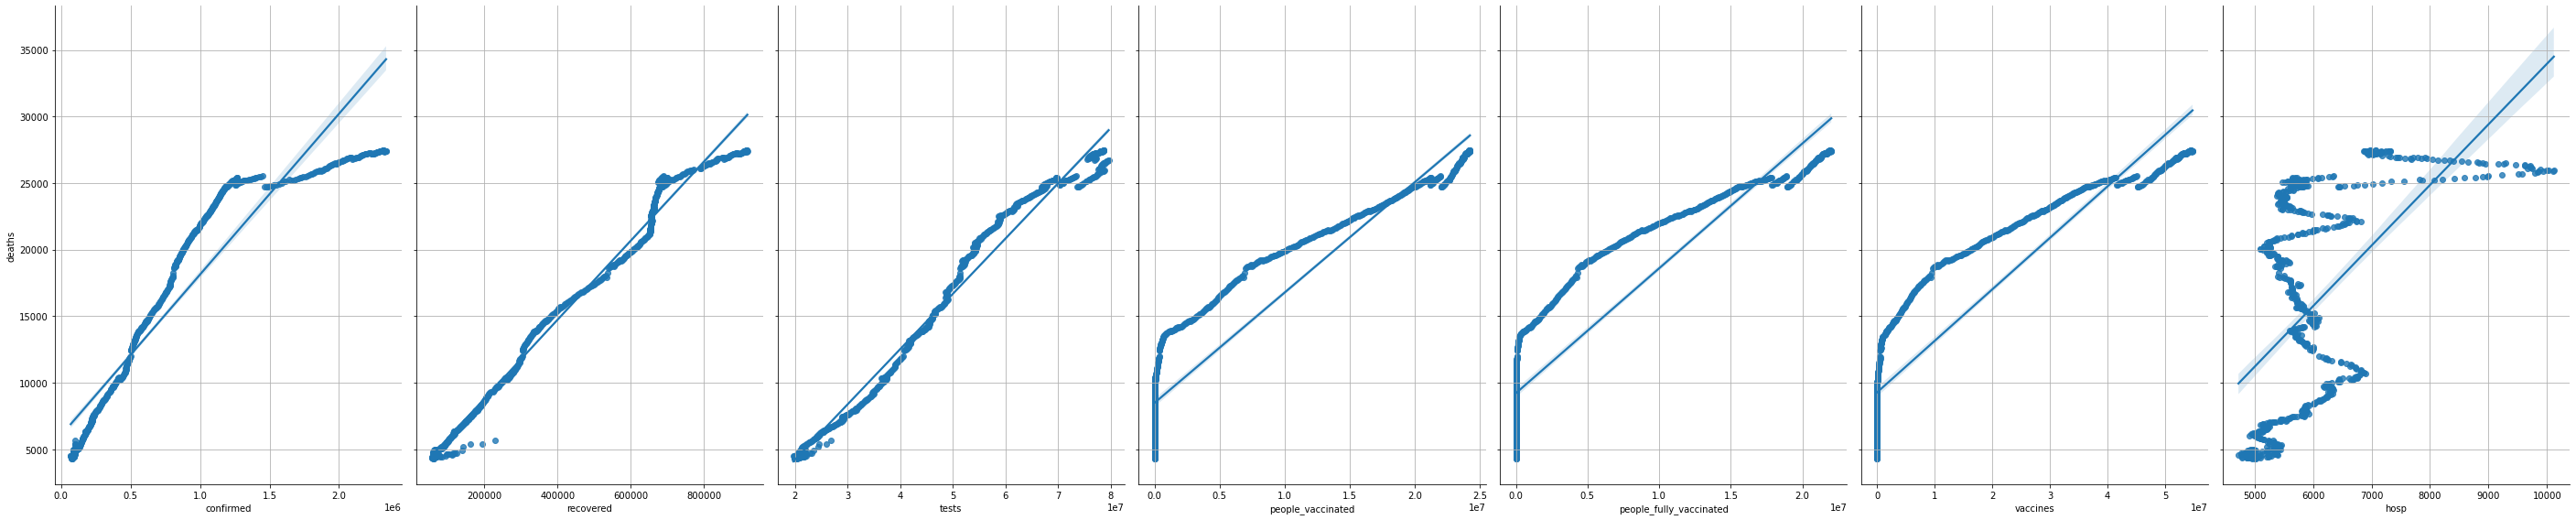

In [74]:
g = sns.PairGrid(data_grouped, x_vars = ['confirmed', 'recovered', 'tests', 'people_vaccinated', 'people_fully_vaccinated', 'vaccines', 'hosp'], y_vars =['deaths'], size = 8, aspect = 0.7)
g.map(sns.regplot)
plt.tight_layout()

Na podstawie powyzszych wykresow mozemy stwierdzic, ze zmienne confirmed, recovered, tests sa wspoliniowe.
### <h3> 3.4 Wizualizacja dopasowania dla regresji liniowej. </h3>

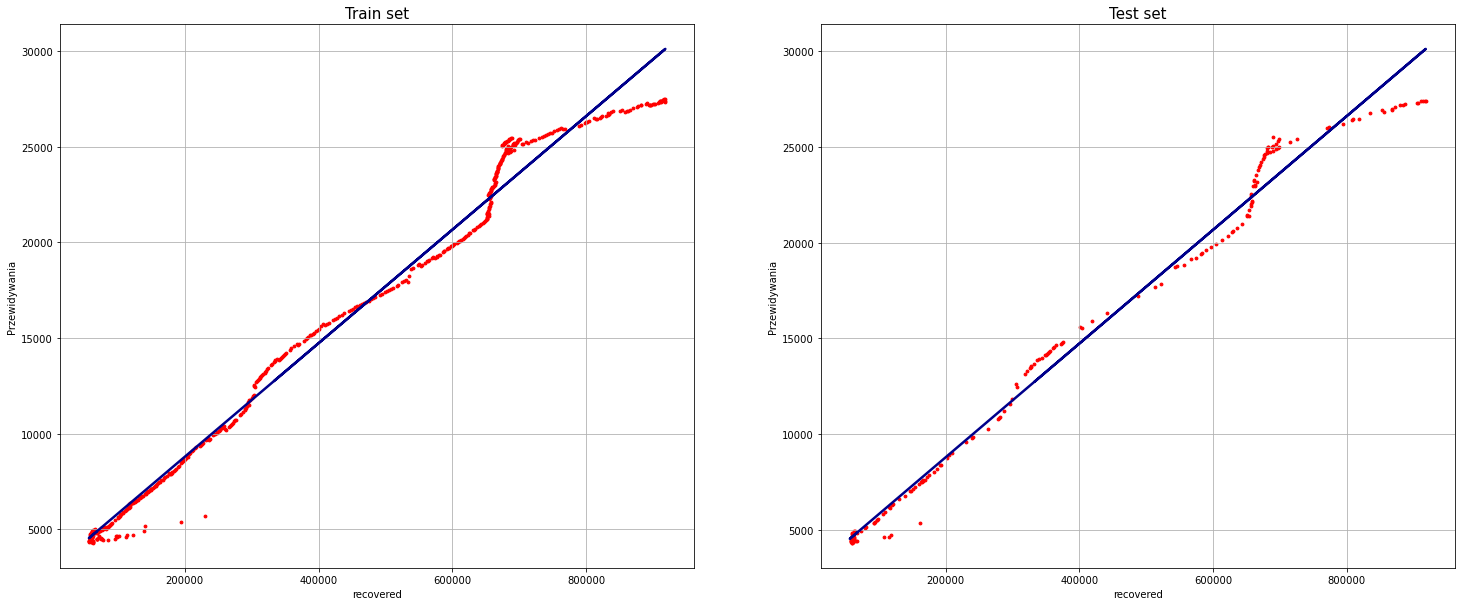

In [75]:
linear_regression_visualization(X_train, X_test, y_train, y_test, regressor, 'recovered')

#### <h4> 4.4.1 Sprawdzenie korelacji pomiedzy zmiennymi. </h4>

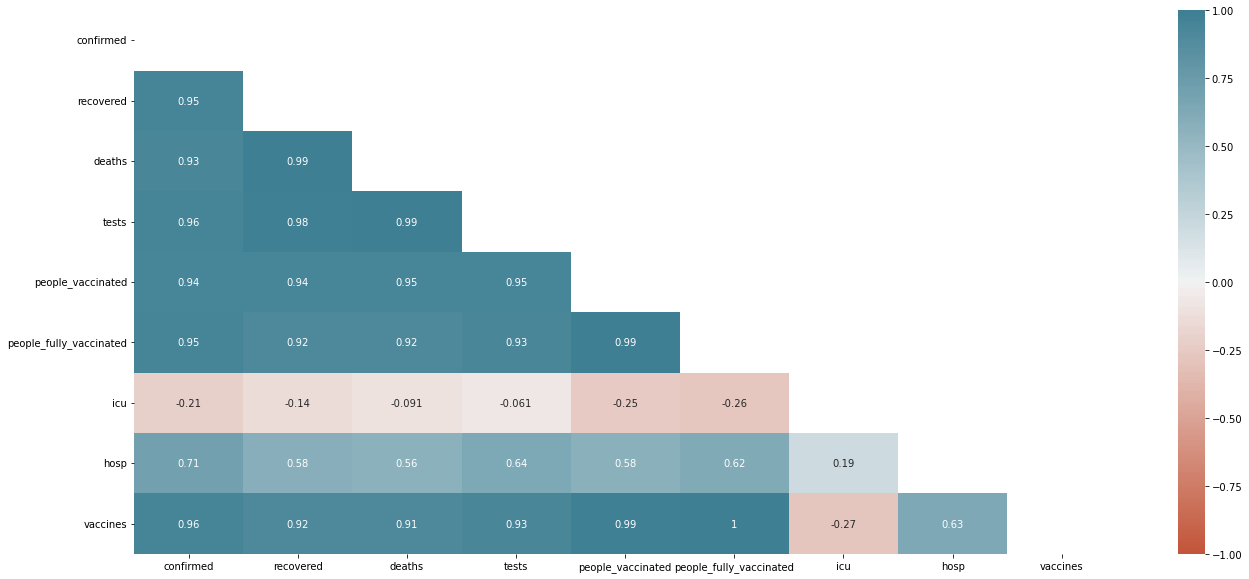

In [76]:
plot_corr_heatmap(data_grouped)

### <h3> 4.5 Model regresji wielorakiej. </h3>
Do regresji wielorakiej wybieram zmienne recovered. Confirmed oraz tests odrzucam ze wzgledu na wysoka korelacje z recovered. Z pozostalych wybieram vaccines, natomiast pozostale odpadaja z tych samych powodow. Hosp odrzucam ze wzgledu na calkowity brak wspoliniowosci ze zmienna deaths, ktora chcemy przewidywac.

In [77]:
regressor = LinearRegression()
scaler = StandardScaler()

#standaryzacja danych - podobnie jak dla SVR
X_train_sc = scaler.fit_transform(X_train[['recovered', 'vaccines']])
X_test_sc = scaler.transform(X_test[['recovered', 'vaccines']])

regressor.fit(X_train_sc, y_train)
y_pred = regressor.predict(X_test_sc)

print(f'Wynik bledu R^2 dla modelu regresji wielorakiej to: {round(r2_score(y_test, y_pred), 2)}, RMSE: {round(mean_squared_error(y_test, y_pred), 2)}')

Wynik bledu R^2 dla modelu regresji wielorakiej to: 0.99, RMSE: 975544.74


#### <h4> 4.5.1 Porownanie wynikow modelu regresji liniowej oraz wielorakiej.

In [78]:
print(f"[REGRESJA WIELORAKA]:\nTrain score: {regressor.score(X_train_sc, y_train)*100:.2f}%\nTest score: {regressor.score(X_test_sc, y_test)*100:.2f}%\n")
print(f"[REGRESJA LINIOWA]:\nTrain score: {linear_r2_train * 100:.2f}%\nTest score: {linear_r2_test * 100:.2f}%\n")

[REGRESJA WIELORAKA]:
Train score: 98.48%
Test score: 98.58%

[REGRESJA LINIOWA]:
Train score: 98.47%
Test score: 98.60%



### <h3> 4.6 SVR. </h3>

In [79]:
fit_predict_output(X_train, X_test, y_train, y_test, SVR())

[SVR]:
Train score: 3.24%
Test score: 2.35%



### <h3> 4.7 DecisionTreeRegressor. </h3>

In [80]:
fit_predict_output(X_train, X_test, y_train, y_test, DecisionTreeRegressor())

[DecisionTreeRegressor]:
Train score: 100.00%
Test score: 99.98%



### <h3> 4.8 RandomForestRegressor. </h3>

In [81]:
fit_predict_output(X_train, X_test, y_train, y_test, RandomForestRegressor())

[RandomForestRegressor]:
Train score: 100.00%
Test score: 99.99%



## <h2> 5. Krotkie podsumowanie dla danych globalnych. </h2>
Wyniki predykcji sa na bardzo wysokim poziomie, natomiast zarowno dla liczby zakazen jak i smierci zalozenia dla regresji liniowej nie sa spelnione. Rowniez wybor zmiennych do regresji wielorakiej nie jest idealny - zmienne sa ze soba mocno skorelowane i zaklamuja skutecznosc tlumaczenia wariancji przez modele. Mozemy rowniez zauwazyc bardzo ciekawa anomalie - SVR w obu przypadkach daje bardzo mizerne rezultaty.
# <h1> Dane lokalne </h1>
## <h2> 6.1 Wybor panstwa do przeprowadzenia analizy lokalnej - USA. </h2>


In [82]:
data_usa = data_copy_1[data_copy_1['iso_alpha_3'] == 'USA'].reset_index(drop = True)#.groupby(['date']).mean().reset_index()
data_usa.head(10)

,date,confirmed,recovered,deaths,tests,people_vaccinated,people_fully_vaccinated,icu,hosp,vaccines,iso_alpha_3,month
0,2020-04-01,215391.0,391162.102765,5325.0,1686812.0,0.0,0.0,1074.759365,5925.333051,0.0,USA,2020-04
1,2020-04-02,245108.0,391162.102765,6541.0,1848601.0,0.0,0.0,1074.759365,5925.333051,0.0,USA,2020-04
2,2020-04-03,277426.0,391162.102765,7932.0,2017903.0,0.0,0.0,1074.759365,5925.333051,0.0,USA,2020-04
3,2020-04-04,312525.0,391162.102765,9488.0,2165655.0,0.0,0.0,1074.759365,5925.333051,0.0,USA,2020-04
4,2020-04-05,338141.0,391162.102765,10856.0,2304302.0,0.0,0.0,1074.759365,5925.333051,0.0,USA,2020-04
5,2020-04-06,369057.0,391162.102765,12382.0,2447404.0,0.0,0.0,1074.759365,5925.333051,0.0,USA,2020-04
6,2020-04-07,399394.0,391162.102765,14616.0,2627393.0,0.0,0.0,1074.759365,5925.333051,0.0,USA,2020-04
7,2020-04-08,431214.0,391162.102765,16701.0,2795726.0,0.0,0.0,1074.759365,5925.333051,0.0,USA,2020-04
8,2020-04-09,465913.0,391162.102765,18821.0,2969796.0,0.0,0.0,1074.759365,5925.333051,0.0,USA,2020-04
9,2020-04-10,499386.0,391162.102765,21084.0,3141906.0,0.0,0.0,1074.759365,5925.333051,0.0,USA,2020-04


### <h3> 6.2 Krotka eksploracyjna analiza danych dla USA. </h3>

In [83]:
data_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     760 non-null    datetime64[ns]
 1   confirmed                760 non-null    float64       
 2   recovered                760 non-null    float64       
 3   deaths                   760 non-null    float64       
 4   tests                    760 non-null    float64       
 5   people_vaccinated        760 non-null    float64       
 6   people_fully_vaccinated  760 non-null    float64       
 7   icu                      760 non-null    float64       
 8   hosp                     760 non-null    float64       
 9   vaccines                 760 non-null    float64       
 10  iso_alpha_3              760 non-null    object        
 11  month                    760 non-null    period[M]     
dtypes: datetime64[ns](1), float64(9), ob

In [84]:
data_usa.describe()

,confirmed,recovered,deaths,tests,people_vaccinated,people_fully_vaccinated,icu,hosp,vaccines
count,7.600000e+02,760.000000,760.000000,7.600000e+02,7.600000e+02,7.600000e+02,760.000000,760.000000,7.600000e+02
mean,3.164292e+07,407216.814266,502904.542105,3.954752e+08,1.166850e+08,9.743796e+07,11816.769898,48448.021497,2.294260e+08
std,2.447445e+07,293111.428595,290444.804732,2.739905e+08,1.058659e+08,9.272229e+07,8294.330447,37625.216254,2.201045e+08
min,2.153910e+05,2740.407474,5325.000000,1.686812e+06,0.000000e+00,0.000000e+00,571.666450,2424.062714,0.000000e+00
25%,7.646154e+06,120929.971597,212448.000000,1.276705e+08,0.000000e+00,0.000000e+00,4635.000000,17869.500000,0.000000e+00
50%,3.154993e+07,391162.102765,565326.500000,4.055170e+08,1.370151e+08,9.168342e+07,10506.000000,39373.500000,2.237580e+08
75%,4.538390e+07,667265.758851,735811.250000,6.191536e+08,2.198972e+08,1.949366e+08,17727.000000,69758.500000,4.206312e+08
max,8.126023e+07,910493.500166,992010.000000,8.739356e+08,2.579203e+08,2.199520e+08,28891.000000,154540.000000,5.773802e+08


In [85]:
print(f'Ksztalt danych: {data_usa.shape}, dlugosc: {len(data_usa)}, rozmiar: {data_usa.size}')

Ksztalt danych: (760, 12), dlugosc: 760, rozmiar: 9120


### <h3> 6.3 Dolnotrojkatna macierz korelacji. </h3>

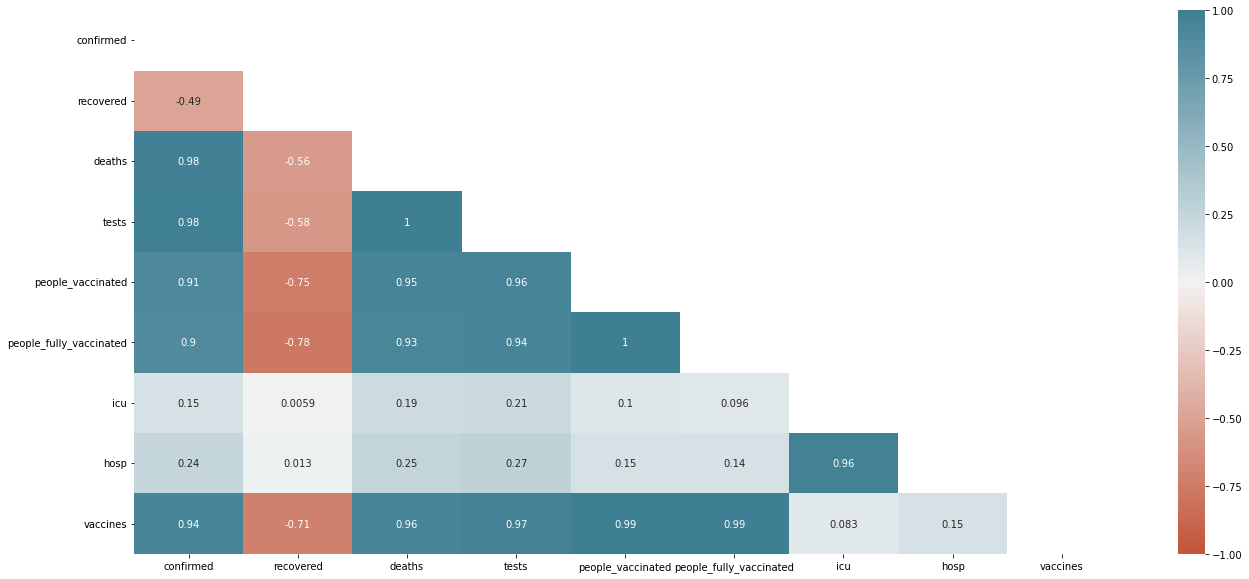

In [86]:
corr = data_usa.corr()

plot_corr_heatmap(data_usa)

### <h3> 6.4 Wizualizacja zmiennych w zaleznosci od daty. </h3>

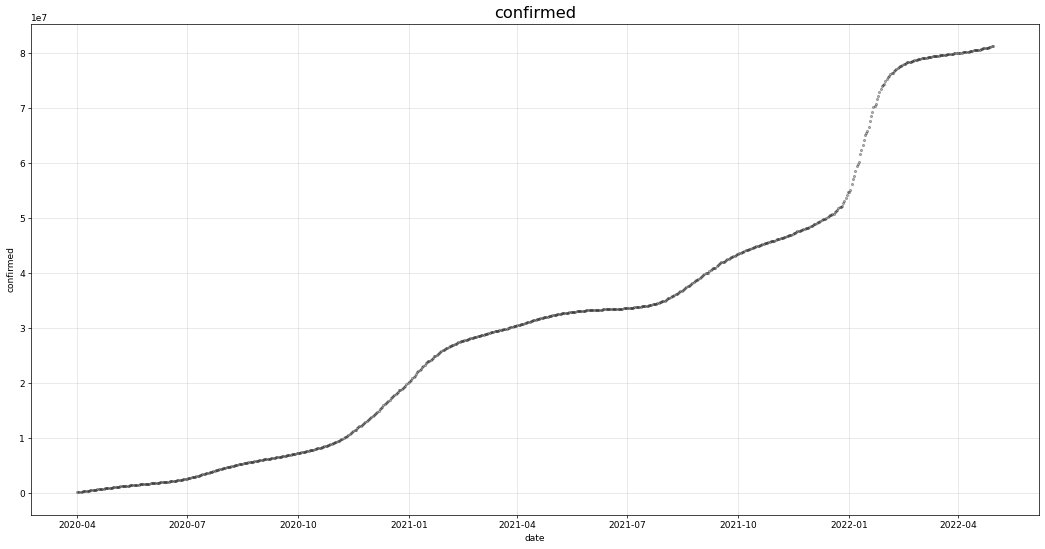

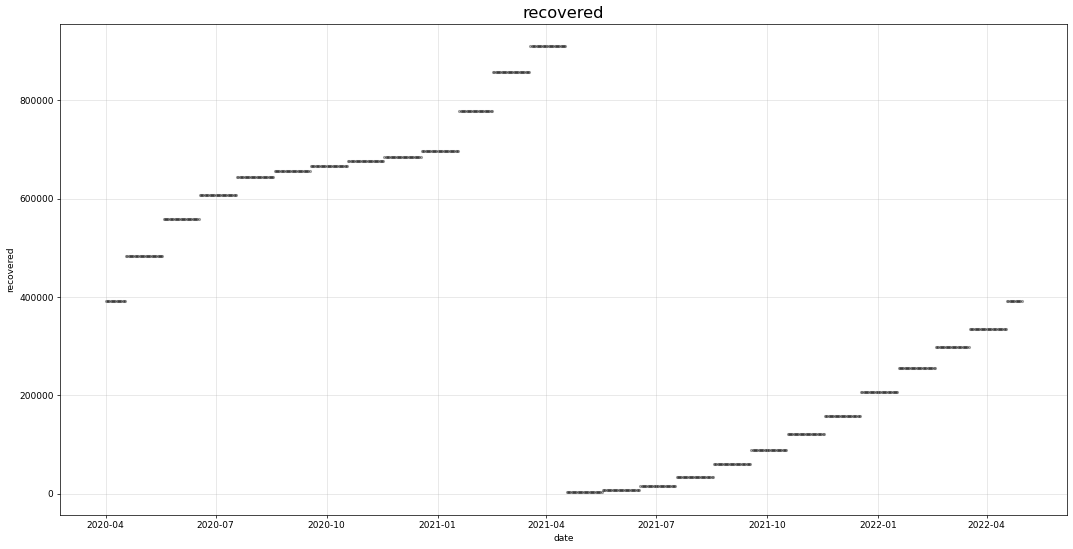

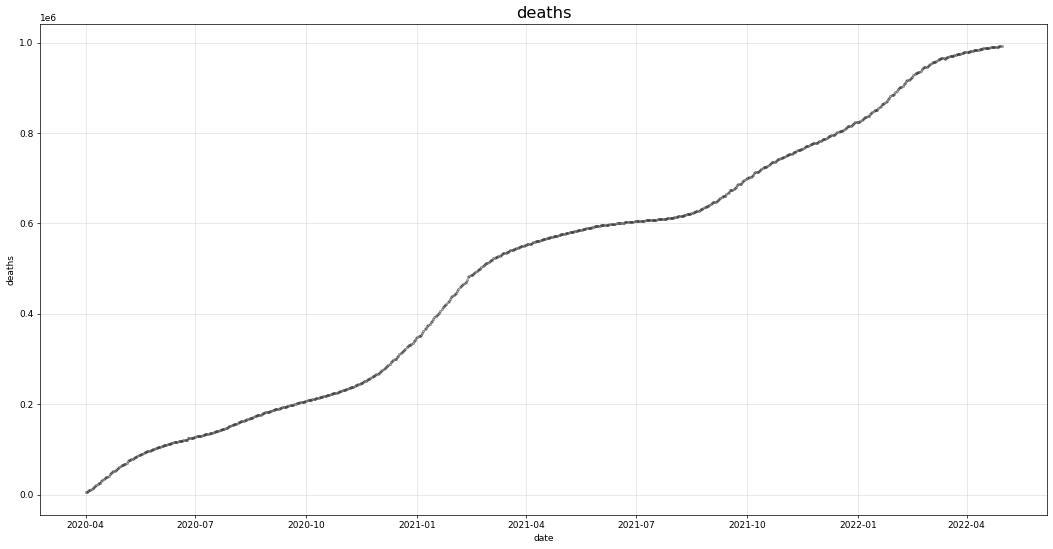

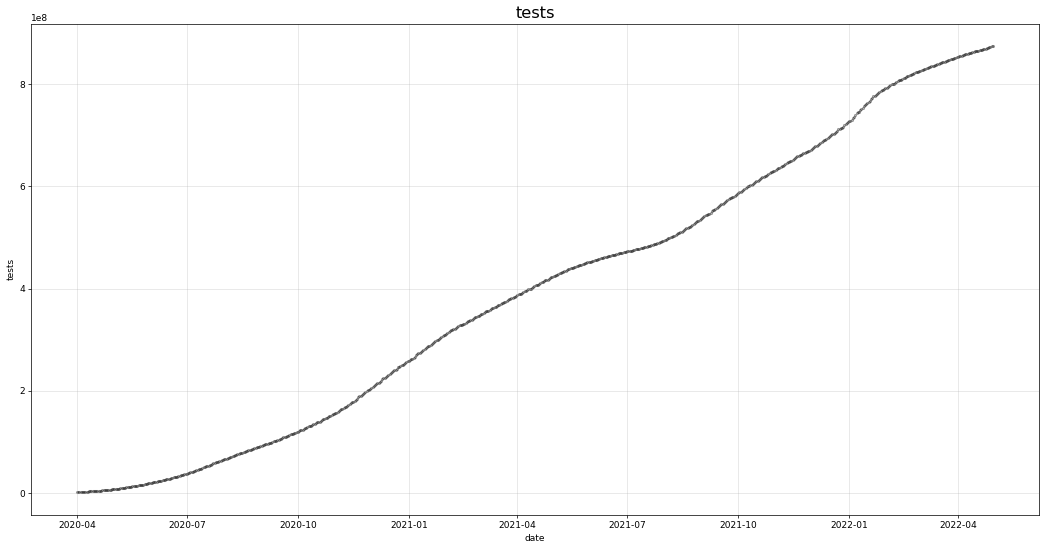

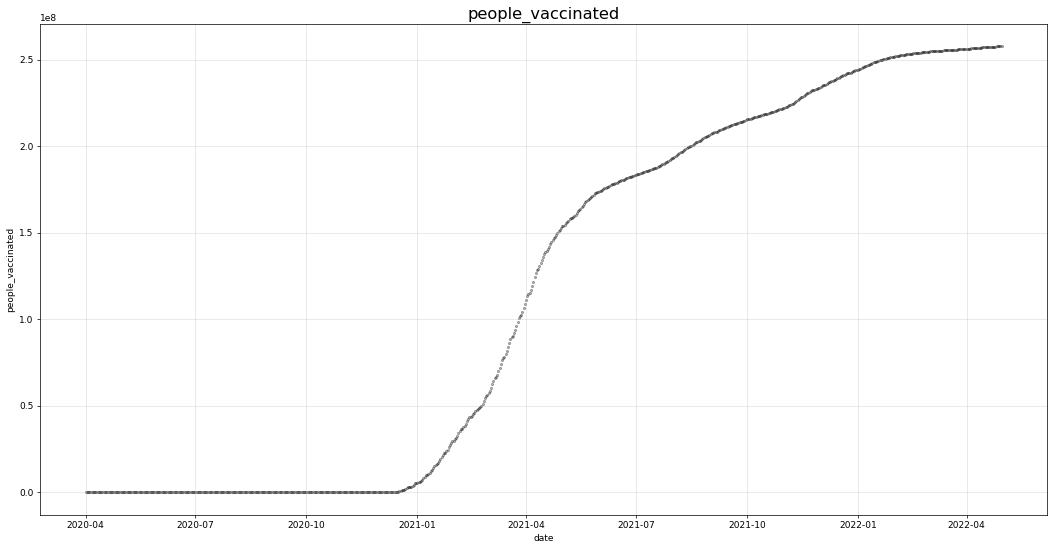

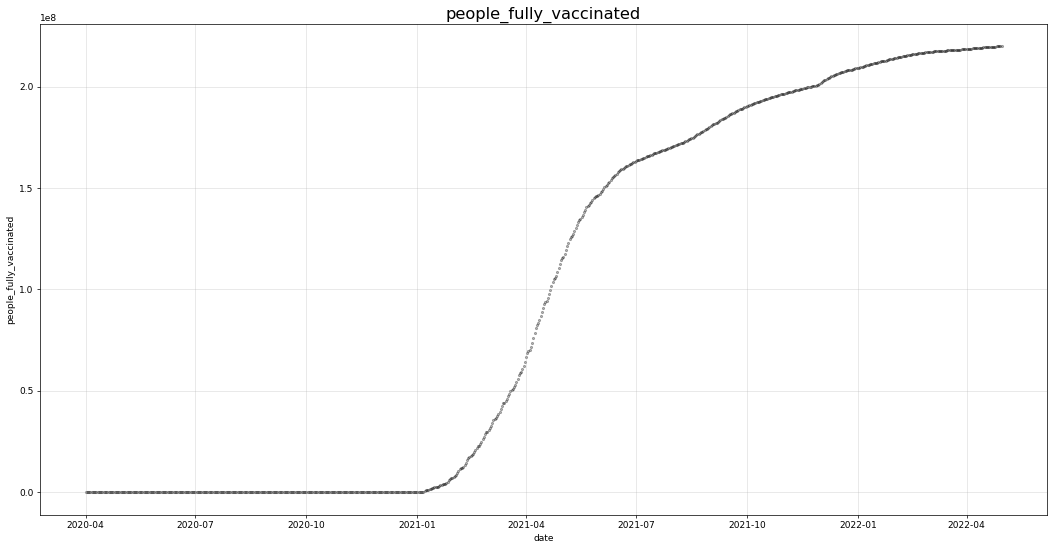

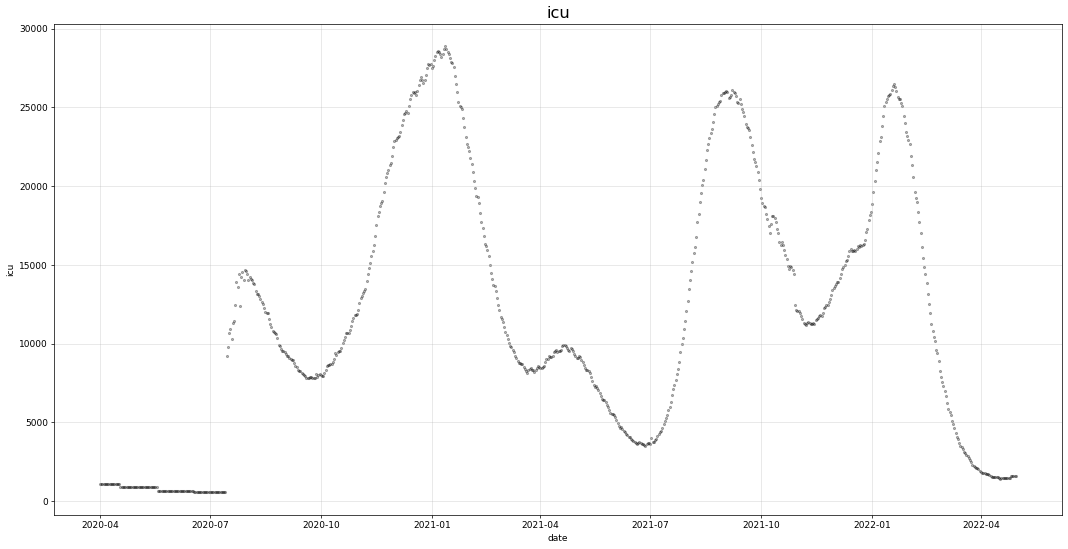

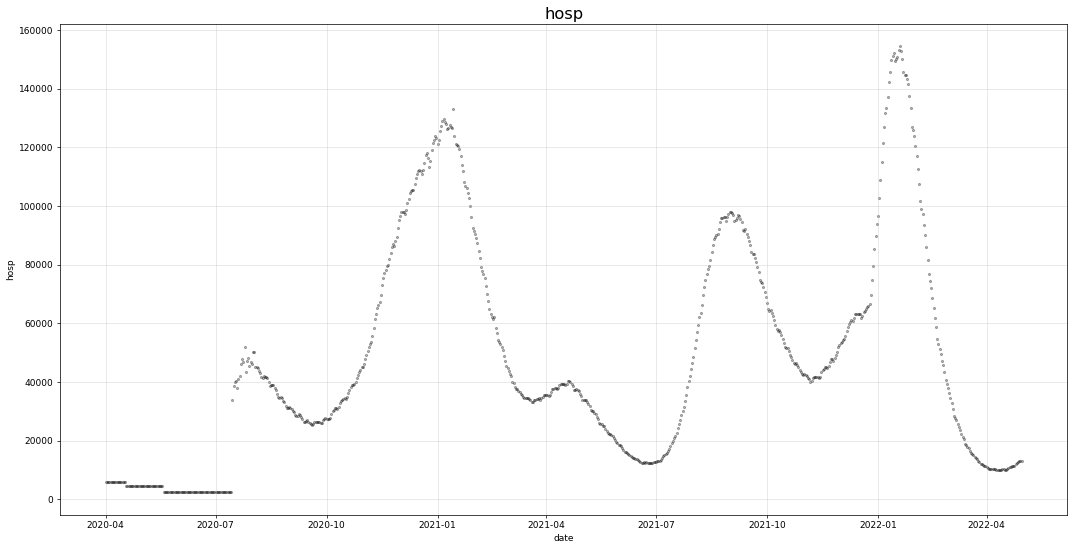

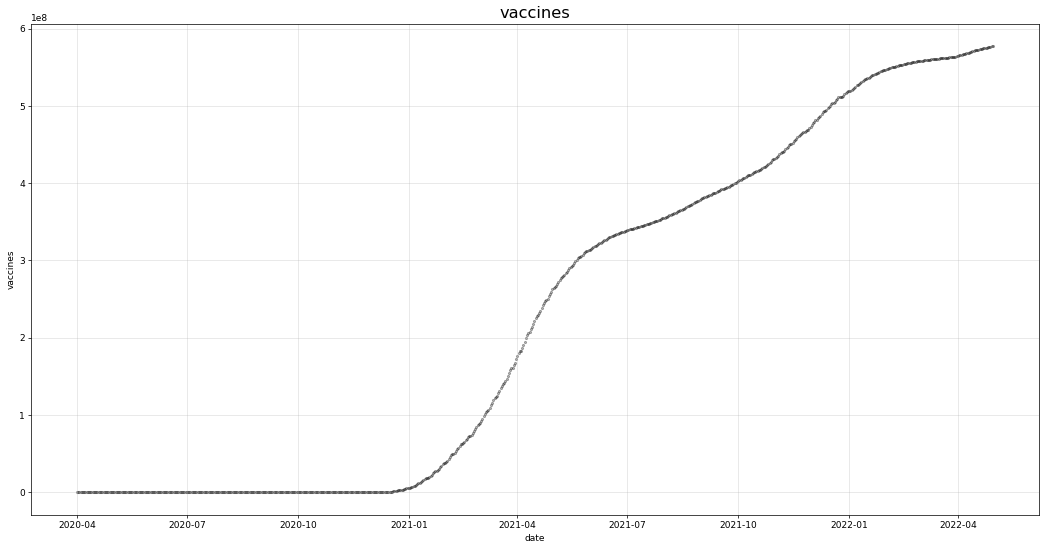

In [87]:
for i in data_usa.columns[np.r_[1:10]]:
    plot_grupped_data(data_usa, 'date', i, i)

## <h2> 7. Lokalna predykcja liczby zachorowan. </h2>
### <h3> 7.1 Wyswietlenie wspolczynnikow korelacji dla cechy confirmed. </h3>

In [88]:
round(corr.sort_values('confirmed', ascending = False)['confirmed'], 2)

confirmed                  1.00
tests                      0.98
deaths                     0.98
vaccines                   0.94
people_vaccinated          0.91
people_fully_vaccinated    0.90
hosp                       0.24
icu                        0.15
recovered                 -0.49
Name: confirmed, dtype: float64

Najwyzsze wspolczynniki korelacji wystepuja dla zmiennych tests oraz deaths - 0.98. Sprobujmy przewidziec liczbe zachorowan na podstawie tests, deaths, vaccines, people_vaccinated, people_fully_vaccinated.
### <h3> 7.2 Modele regresji liniowej. </h3>

In [89]:
X = data_grouped[['deaths', 'tests', 'people_vaccinated', 'people_fully_vaccinated', 'vaccines']]
y = data_grouped[['confirmed']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [90]:
regressor = LinearRegression()
output = create_lm(X_train, X_test, y_train, y_test, X.columns, regressor)
output_df = pd.DataFrame(output).sort_values('r^2', ascending = False)
output_df

,column_used,r^2,rmse
1,tests,0.92,3.448757e+10
4,vaccines,0.92,3.408018e+10
3,people_fully_vaccinated,0.91,3.828219e+10
2,people_vaccinated,0.89,4.611358e+10
0,deaths,0.87,5.181044e+10


Najwyzszy blad R^2 uzyskalismy dla zmiennej tests, sprobujmy ja wybrac jako poki co najlepiej rokujaca.

In [91]:
regressor.fit(X_train[['tests']], y_train)

linear_r2_train = regressor.score(X_train[['tests']], y_train)
linear_r2_test = regressor.score(X_test[['tests']], y_test)

print(f"Train score: {regressor.score(X_train[['tests']], y_train)*100:.2f}%\nTest score: {regressor.score(X_test[['tests']], y_test)*100:.2f}%")

Train score: 91.88%
Test score: 91.62%


#### <h4> 7.2.1 Wizualizacja metryk modeli regresji liniowej. </h4>

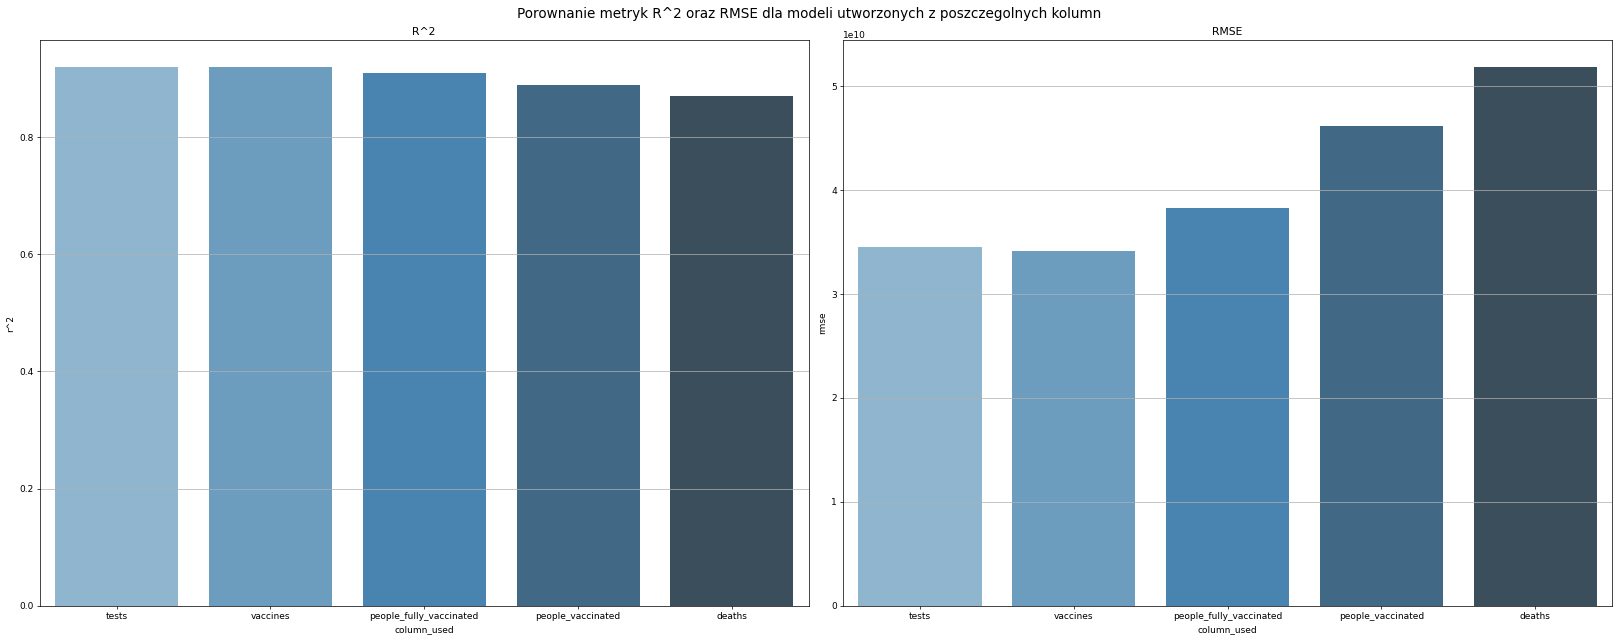

In [92]:
metric_comparasion(output_df)

### <h3> 7.3 Sprawdzenie zalozen regresji liniowej dla zmiennej dajacej najlepsze metryki - tests. </h3>
#### <h4> 7.3.1 Obliczenie sredniej rezyduow. </h4>

In [93]:
regressor.fit(X_train[['tests']], y_train)
y_pred = regressor.predict(X_test[['tests']])
residuals = y_test - y_pred

print(f'Srednia rezyduow wynosi {np.mean(residuals.values):.2f}')

Srednia rezyduow wynosi 7634.47


#### <h4> 7.3.2 Sprawdzenie homoskedastycznosci. </h4>

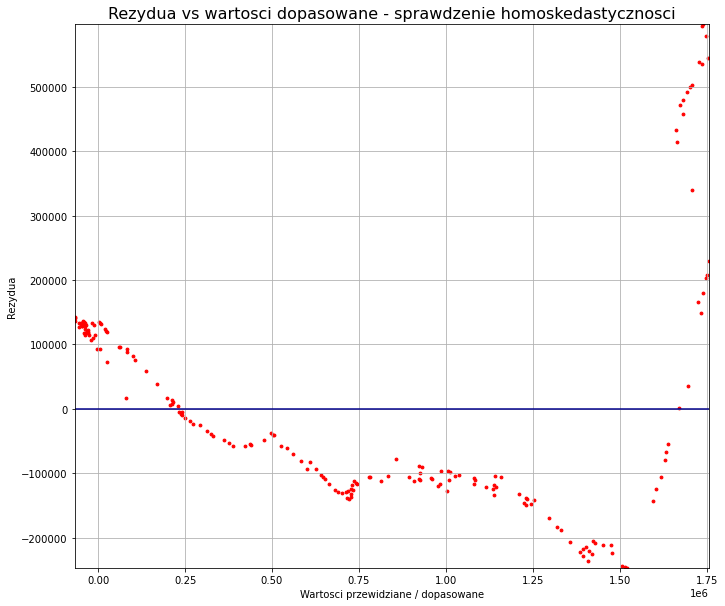

In [94]:
homoscedasticity_check_plot(y_pred, residuals)

Warunek homoskedastycznosci rezyduow niestety nie jest spelniony, znowu widzimy outliersy po prawej stronie wykresu. Srednia jest stosunkowo mala, ale nie jest rowna 0.

#### <h4> 7.3.3 Sprawdzenie, czy rezydua maja rozklad normalny. </h4>

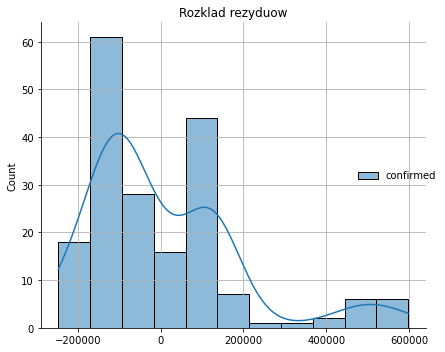

In [95]:
normality_residuals_plot(residuals)

Rozklad rezyduow nie jest rozkladem normalnym - po prawej stronie widzimy wplyw wartosci odstajacych.
#### <h4> 7.3.4 Sprawdzenie autokorelacji rezyduow. </h4>

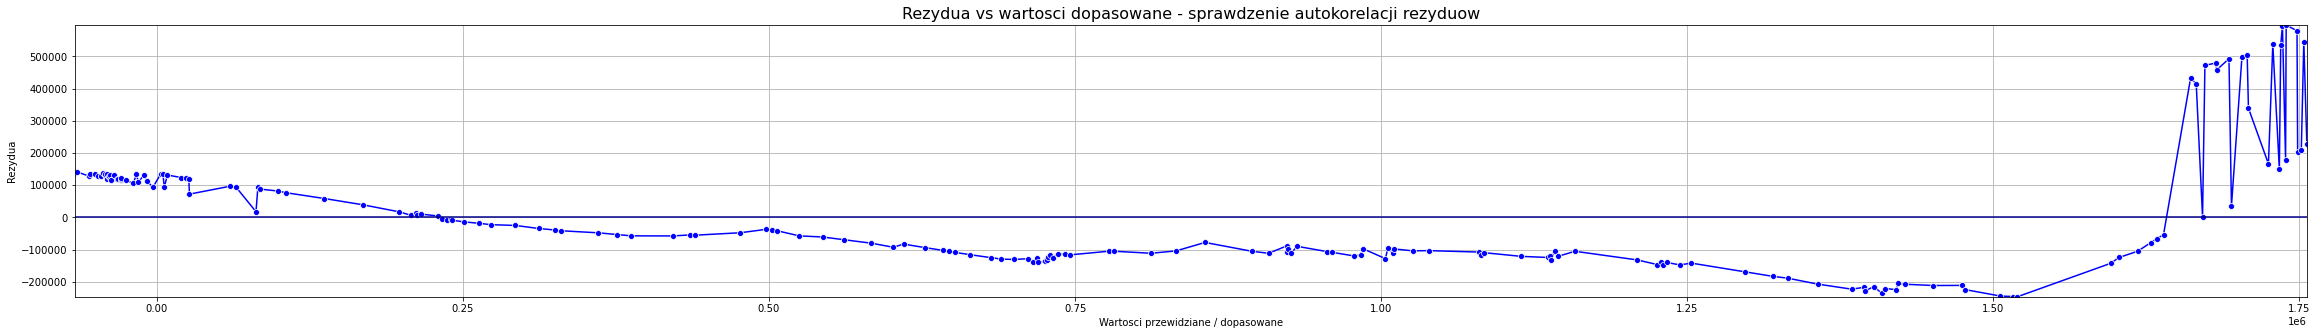

In [96]:
residuals_autocorrelation_check_plot(y_pred, residuals)

Widzimy zauwazalny trend co swiadczy o autokorelacji rezyduow, co negatywnie wplywa na ostateczna ocene naszego modelu prostej regresji liniowej.
#### <h4> 7.3.5 Sprawdzenie wspoliniowosci zmiennych. </h4>

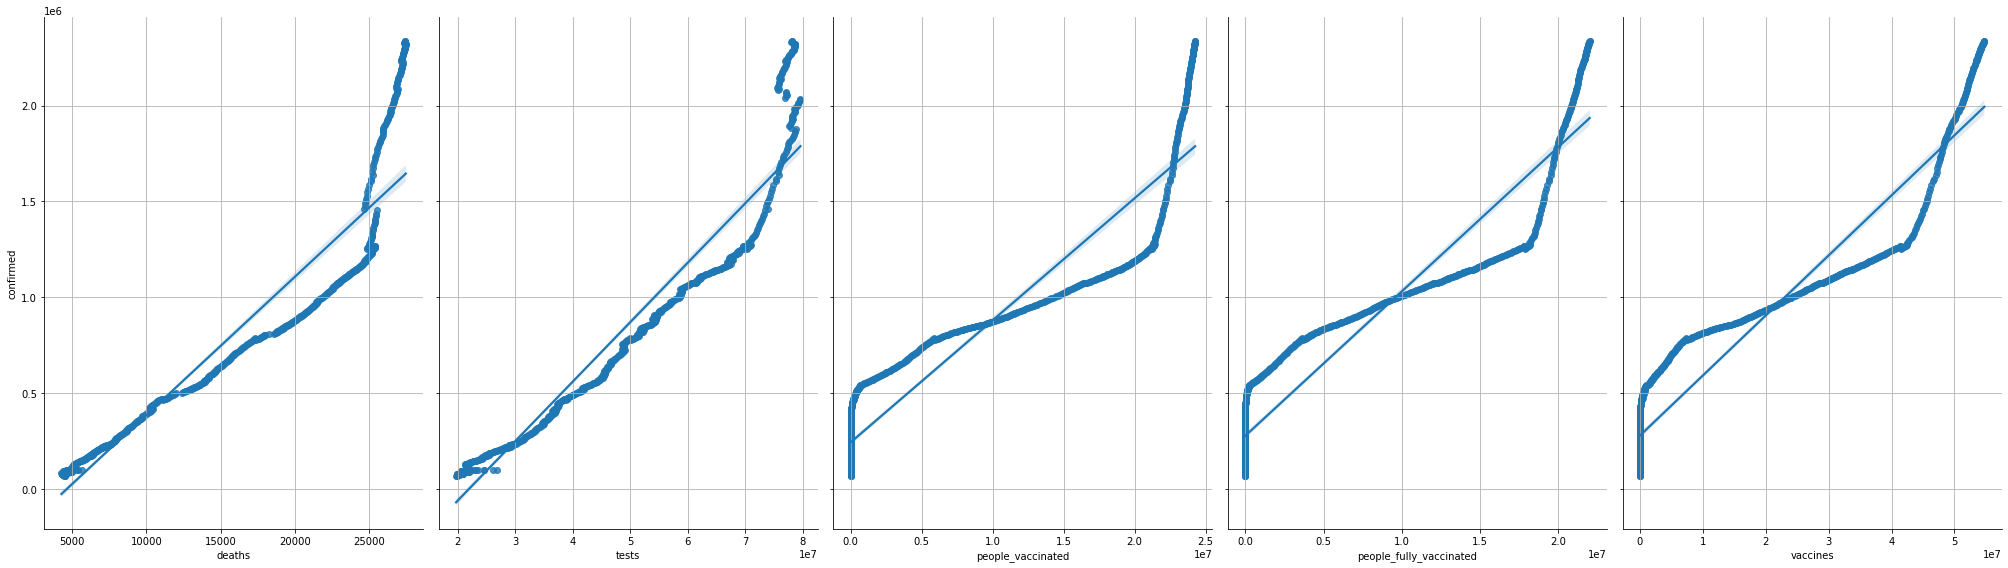

In [97]:
g = sns.PairGrid(data_grouped, x_vars = ['deaths', 'tests', 'people_vaccinated', 'people_fully_vaccinated', 'vaccines'], y_vars =['confirmed'], size = 8, aspect = 0.7)
g.map(sns.regplot)
plt.tight_layout()

Na podstawie powyzszych wykresow mozemy stwierdzic, ze zmienne deaths oraz tests sa wspoliniowe.
### <h3> 7.4 Wizualizacja dopasowania dla regresji liniowej. </h3>

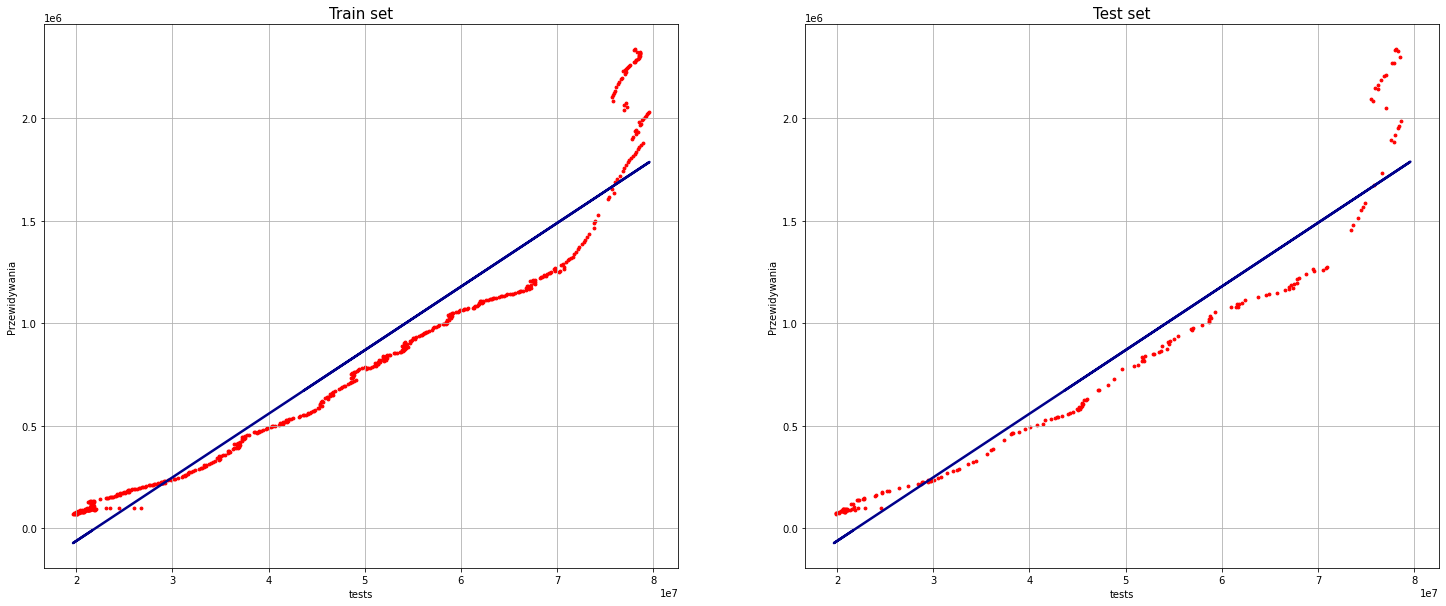

In [98]:
linear_regression_visualization(X_train, X_test, y_train, y_test, regressor, 'tests')

#### <h4> 7.4.1 Sprawdzenie korelacji pomiedzy zmiennymi. </h4>

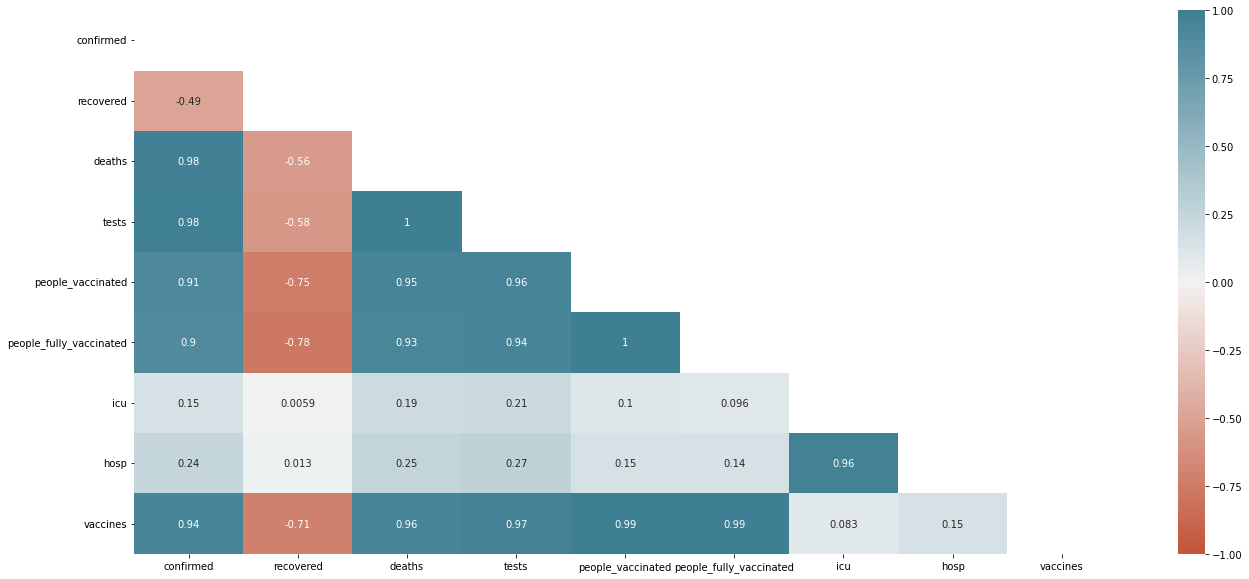

In [99]:
plot_corr_heatmap(data_usa)

### <h3> 7.5 Model regresji wielorakiej. </h3>
Do regresji wielorakiej wybieram zmienne tests oraz people_fully_vaccinated. Tak jak we wszystkich poprzednich przypadkach zmienne te sa ze soba dosc silnie skorelowane, ale ciezko tutaj o sensowniejszy wybor. Pozostale zmienne odrzucamy z podobnych powodow albo braku wspoliniowosci z confirmed.

In [100]:
egressor = LinearRegression()
scaler = StandardScaler()

#standaryzacja danych - podobnie jak dla SVR
X_train_sc = scaler.fit_transform(X_train[['tests', 'people_fully_vaccinated']])
X_test_sc = scaler.transform(X_test[['tests', 'people_fully_vaccinated']])

regressor.fit(X_train_sc, y_train)
y_pred = regressor.predict(X_test_sc)

print(f'Wynik bledu R^2 dla modelu regresji wielorakiej to: {round(r2_score(y_test, y_pred), 2)}, RMSE: {round(mean_squared_error(y_test, y_pred), 2)}')

Wynik bledu R^2 dla modelu regresji wielorakiej to: 0.95, RMSE: 22575162967.0


#### <h4> 7.5.1 Porownanie wynikow modelu regresji liniowej oraz wielorakiej.

In [101]:
print(f"[REGRESJA WIELORAKA]:\nTrain score: {regressor.score(X_train_sc, y_train)*100:.2f}%\nTest score: {regressor.score(X_test_sc, y_test)*100:.2f}%\n")
print(f"[REGRESJA LINIOWA]:\nTrain score: {linear_r2_train * 100:.2f}%\nTest score: {linear_r2_test * 100:.2f}%\n")

[REGRESJA WIELORAKA]:
Train score: 94.31%
Test score: 94.51%

[REGRESJA LINIOWA]:
Train score: 91.88%
Test score: 91.62%



### <h3> 7.6 SVR. </h3>

In [102]:
fit_predict_output(X_train, X_test, y_train, y_test, SVR())

[SVR]:
Train score: -1.81%
Test score: -0.72%



### <h3> 7.7 DecisionTreeRegressor. </h3>

In [103]:
fit_predict_output(X_train, X_test, y_train, y_test, DecisionTreeRegressor())

[DecisionTreeRegressor]:
Train score: 100.00%
Test score: 99.99%



### <h3> 7.8 RandomForestRegressor. </h3>

In [104]:
fit_predict_output(X_train, X_test, y_train, y_test, RandomForestRegressor())

[RandomForestRegressor]:
Train score: 100.00%
Test score: 99.99%



## <h2> 8. Lokalna predykcja liczby smierci spowodowanych choroba COVID-19. </h2>
### <h3> 8.1 Wyswietlenie wspolczynnikow korelacji dla cechy deaths. </h3>

In [105]:
round(corr.sort_values('deaths', ascending = False)['deaths'], 2)

deaths                     1.00
tests                      1.00
confirmed                  0.98
vaccines                   0.96
people_vaccinated          0.95
people_fully_vaccinated    0.93
hosp                       0.25
icu                        0.19
recovered                 -0.56
Name: deaths, dtype: float64

Najwyzszy wspolczynnik korelacji wystepuje dla zmiennej tests i wynosi az 1.0. Bardzo podobnie dla zmiennej confirmed - 0.98.
#### <h4> 8.2 Modele regresji liniowej. </h4>

In [106]:
X = data_grouped[['tests', 'confirmed', 'vaccines', 'people_vaccinated', 'people_fully_vaccinated']]
y = data_grouped[['deaths']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [107]:
regressor = LinearRegression()
output = create_lm(X_train, X_test, y_train, y_test, X.columns, regressor)
output_df = pd.DataFrame(output).sort_values('r^2', ascending = False)
output_df

,column_used,r^2,rmse
0,tests,0.98,1106505.94
3,people_vaccinated,0.89,7668940.78
1,confirmed,0.87,8685458.56
2,vaccines,0.83,11723197.73
4,people_fully_vaccinated,0.83,11394660.07


Najlepsze wyniki otrzymalismy dla zmiennej tests - R^2 na poziomie 0.98 oraz najnizsze RMSE, wiec wybieram ja jako najlepsza.

In [108]:
regressor.fit(X_train[['tests']], y_train)

linear_r2_train = regressor.score(X_train[['tests']], y_train)
linear_r2_test = regressor.score(X_test[['tests']], y_test)

print(f"Train score: {regressor.score(X_train[['tests']], y_train)*100:.2f}%\nTest score: {regressor.score(X_test[['tests']], y_test)*100:.2f}%")

Train score: 98.12%
Test score: 98.39%


#### <h4> 8.2.1 Wizualizacja metryk modeli regresji liniowej. </h4>

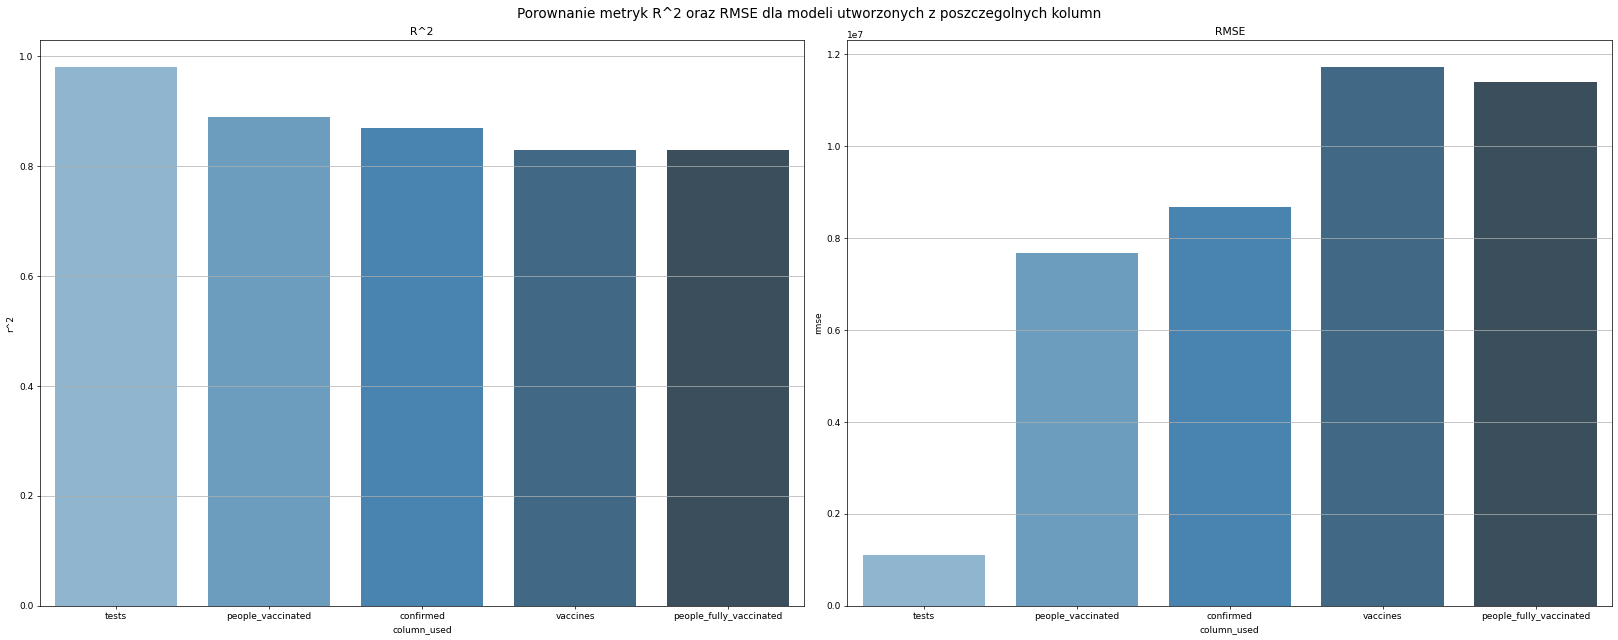

In [109]:
metric_comparasion(output_df)

### <h3> 8.3 Sprawdzenie zalozen regresji liniowej dla zmiennej dajacej najlepsze metryki - tests. </h3>
#### <h4> 8.3.1 Obliczenie sredniej rezyduow. </h4>

In [110]:
regressor.fit(X_train[['tests']], y_train)
y_pred = regressor.predict(X_test[['tests']])
residuals = y_test - y_pred

print(f'Srednia rezyduow wynosi {np.mean(residuals.values):.2f}')

Srednia rezyduow wynosi -10.77


#### <h4> 8.3.2 Sprawdzenie homoskedastycznosci. </h4>

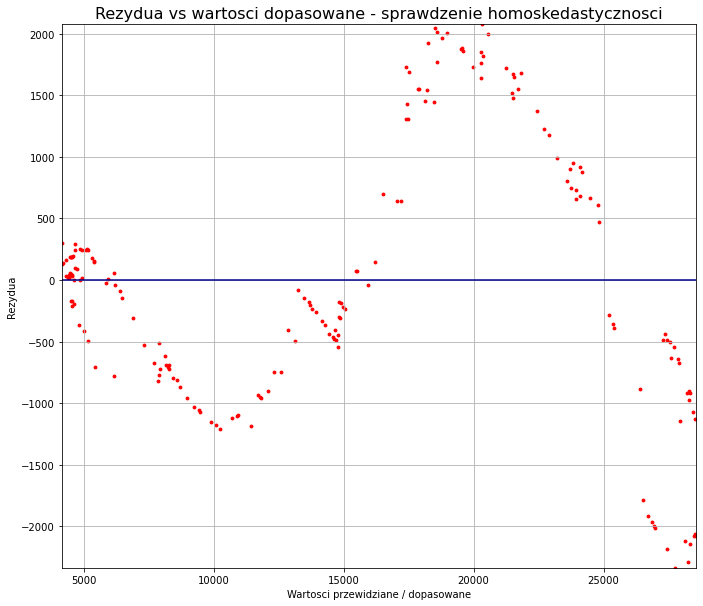

In [111]:
homoscedasticity_check_plot(y_pred, residuals)

Wariancja nie jest stala w czasie - przeszkadzac zdaja sie tutaj glownie wartosci mocno odstajace widiczne po prawej stronie wykresu. Srednia rezyduow oscyluje w okolicach wartosci 0.
#### <h4> 8.3.3 Sprawdzenie, czy rezydua maja rozklad normalny. </h4>

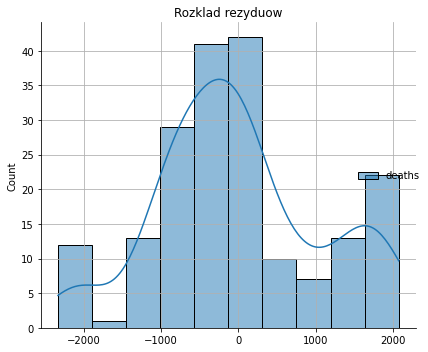

In [112]:
normality_residuals_plot(residuals)

Rozklad jest zblizony do rozkladu normalnego - po raz kolejny najwiekszy negatywny wplyw maja wartosci odstajace ktore obserwujemy tutaj jako slupki znajdujace sie po prawej stronie wykresu.
#### <h4> 8.3.4 Sprawdzenie autokorelacji rezyduow. </h4>

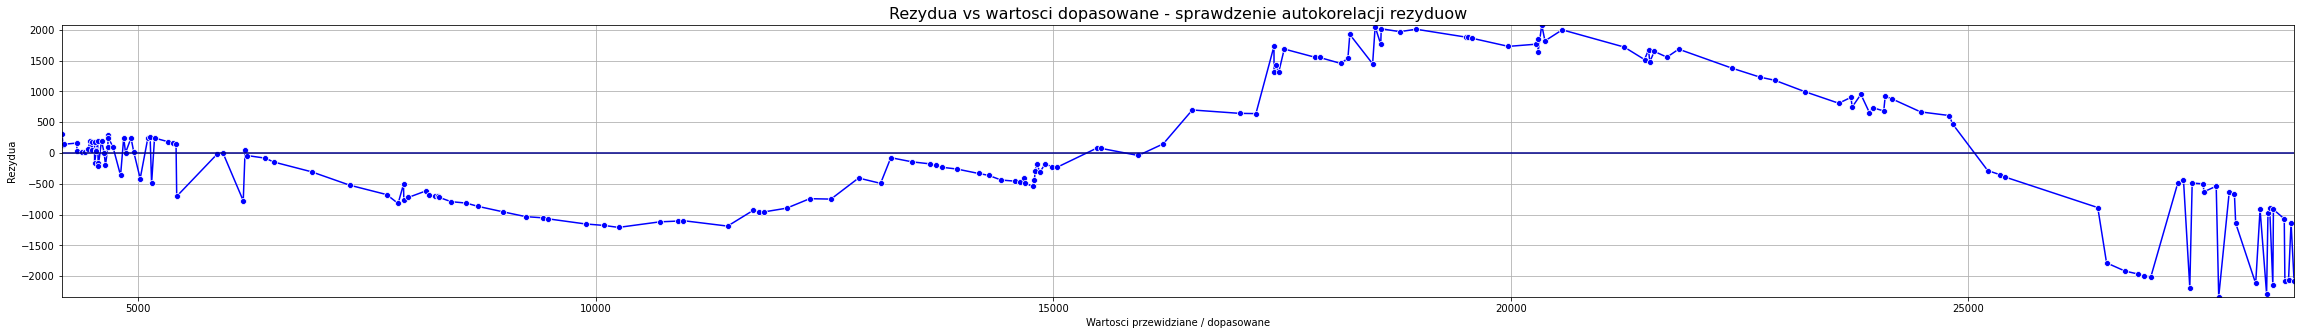

In [113]:
residuals_autocorrelation_check_plot(y_pred, residuals)

Na podstawie powyzszego wykresu widzimy pewne trendy w ulozeniu rezyduow, ale nie wydaja sie one zbyt mocne, co moze swiadczyc o lekkiej autokorelacji rezyduow.
#### <h4> 8.3.5 Sprawdzenie wspoliniowosci zmiennych. </h4>

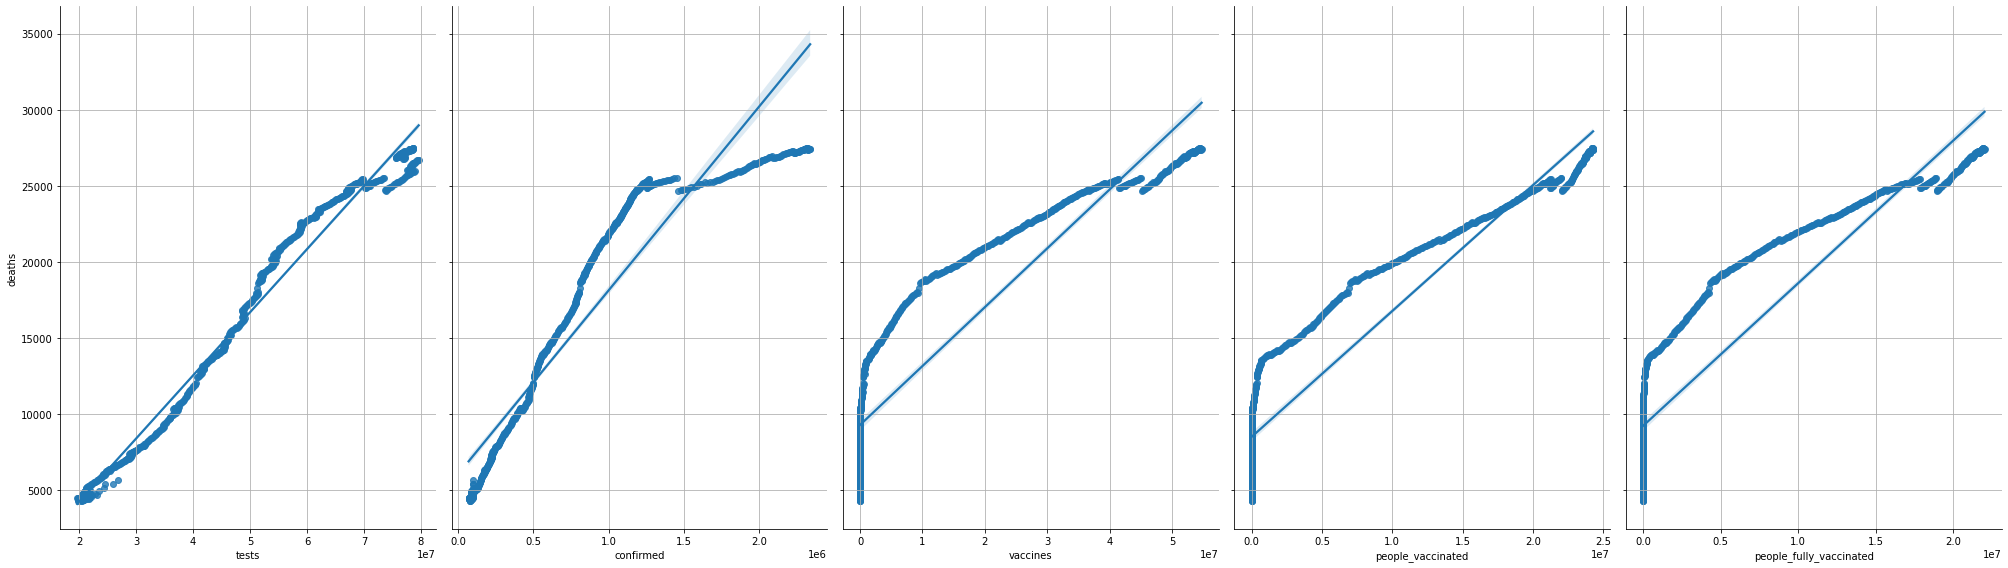

In [114]:
g = sns.PairGrid(data_grouped, x_vars = ['tests', 'confirmed', 'vaccines', 'people_vaccinated', 'people_fully_vaccinated'], y_vars =['deaths'], size = 8, aspect = 0.7)
g.map(sns.regplot)
plt.tight_layout()

Na podstawie powyzszych wykresow mozemy stwierdzic, ze zmienne tests oraz confirmed sa wspoliniowe.
### <h3> 8.4 Wizualizacja dopasowania dla regresji liniowej. </h3>

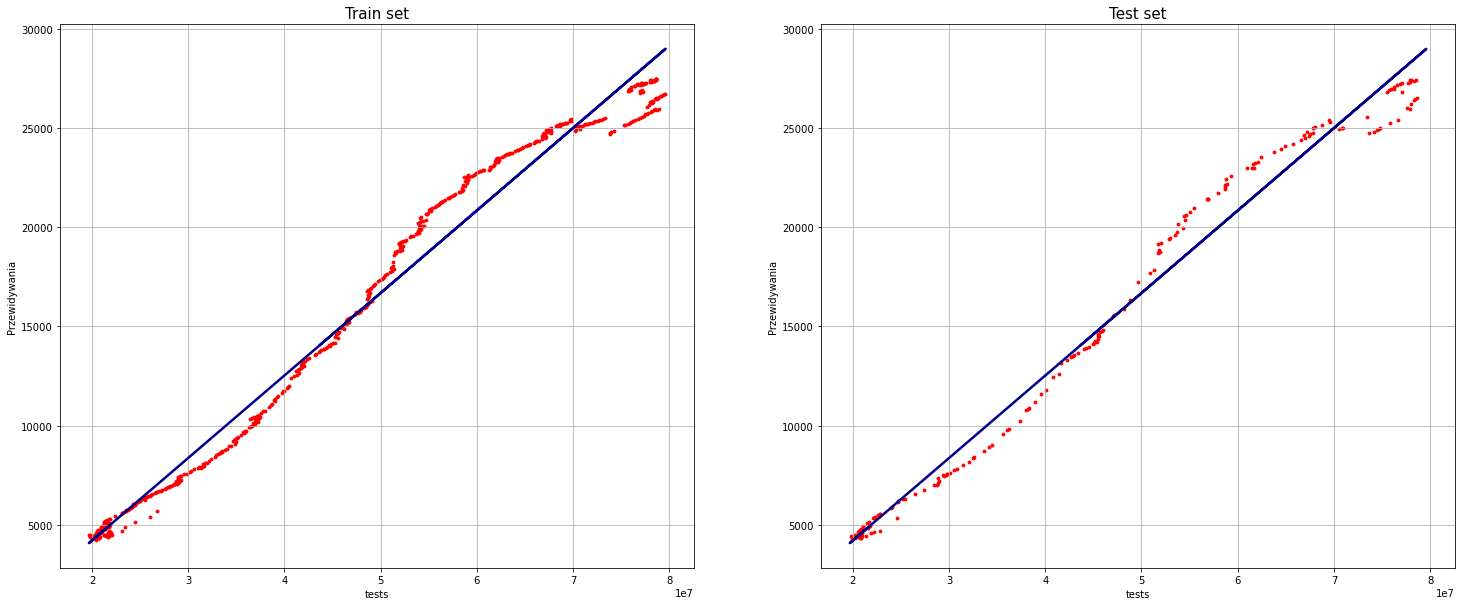

In [115]:
linear_regression_visualization(X_train, X_test, y_train, y_test, regressor, 'tests')

#### <h4> 8.4.1 Sprawdzenie korelacji pomiedzy zmiennymi. </h4>

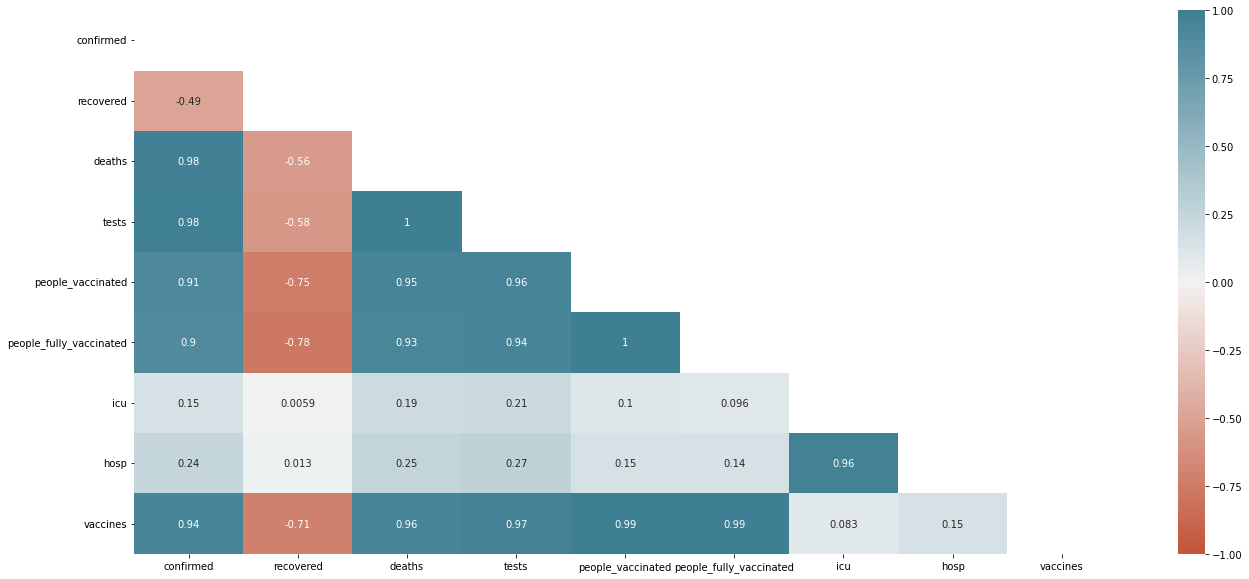

In [116]:
plot_corr_heatmap(data_usa)

### <h3> 8.5 Model regresji wielorakiej. </h3>
Do regresji wielorakiej wybieram zmienne tests oraz people_fully_vaccinated. Jest to po raz kolejny kompromis (nie do konca udany, ale duzego wyboru nie ma) miedzy wspoliniowoscia a korelacja miedzy zmiennymi.

In [117]:
regressor = LinearRegression()
scaler = StandardScaler()

#standaryzacja danych - podobnie jak dla SVR
X_train_sc = scaler.fit_transform(X_train[['people_fully_vaccinated', 'tests']])
X_test_sc = scaler.transform(X_test[['people_fully_vaccinated', 'tests']])

regressor.fit(X_train_sc, y_train)
y_pred = regressor.predict(X_test_sc)

print(f'Wynik bledu R^2 dla modelu regresji wielorakiej to: {round(r2_score(y_test, y_pred), 2)}, RMSE: {round(mean_squared_error(y_test, y_pred), 2)}')

Wynik bledu R^2 dla modelu regresji wielorakiej to: 0.98, RMSE: 1077770.55


#### <h4> 8.5.1 Porownanie wynikow modelu regresji liniowej oraz wielorakiej.

In [118]:
print(f"[REGRESJA WIELORAKA]:\nTrain score: {regressor.score(X_train_sc, y_train)*100:.2f}%\nTest score: {regressor.score(X_test_sc, y_test)*100:.2f}%\n")
print(f"[REGRESJA LINIOWA]:\nTrain score: {linear_r2_train * 100:.2f}%\nTest score: {linear_r2_test * 100:.2f}%\n")

[REGRESJA WIELORAKA]:
Train score: 98.19%
Test score: 98.44%

[REGRESJA LINIOWA]:
Train score: 98.12%
Test score: 98.39%



### <h3> 8.6 SVR. </h3>

In [119]:
fit_predict_output(X_train, X_test, y_train, y_test, SVR())

[SVR]:
Train score: 3.62%
Test score: 2.70%



### <h3> 8.7 DecisionTreeRegressor. </h3>

In [120]:
fit_predict_output(X_train, X_test, y_train, y_test, DecisionTreeRegressor())

[DecisionTreeRegressor]:
Train score: 100.00%
Test score: 99.98%



### <h3> 8.8 RandomForestRegressor. </h3>

In [121]:
fit_predict_output(X_train, X_test, y_train, y_test, RandomForestRegressor())

[RandomForestRegressor]:
Train score: 100.00%
Test score: 99.99%



# <h1> 9. Podsumowanie projektu. </h1>
Wykonana zostala eksploracyjna analiza danych naszego ogromnego zbioru danych, uzupelniona zostala bardzo duza liczba brakow w danych za pomoca kilku metod **(m.in. interpolacja, moving-average, srednia)** a nastepnie zbadalismy dzialanie kilku metod uczenia maszynowego. Zacznijmy od proby odpowiedzi na pytanie **czy algorytmy predykcyjne oparte na regresji sa dobrym rozwiazaniem dla tego problemu.** Wedlug mnie **generalnie tak**, wybor modeli regresyjnych jest jak najbardziej dobry i slusznym wyborem - potwierdzaja to modele oparte na drzewach (wyniki w okolicach 100% wytlumaczenia wariancji). Natomiast **ciezko oszacowac "ufnosc" przewidywan dla naszych modeli.** <br><br>
Mozemy zauwazyc **podobne rezultaty** dzialania modeli **zarowno dla danych lokalnych (w naszym przypadku USA) jak i dla danych globalnych** - regresje liniowe i wielorakie daja wyniki na poziomie **ponad 90%, modele oparte na drzewa wyniki w okolicach 100%**, natomiast SVR wyniki w okolicach 0%. SVR jest modelem bardzo czulym opartym na wektorach, przez co wyniki te moga byc odpowiedzia na zbyt skomplikowana hiperplaszczyzne - model wymaga tuningu hiperparametrow lub zmiany kernela, ale celem projektu bylo porownanie modeli dzialajacych w oparciu o domyslne parametry (standaryzacja danych rowniez nie przyniosla rezultatow). <br><br> **Ogromnym i bardzo czasochlonnym problemem okazalo sie uzupelnianie brakow w danych** - bylo ich na tyle duzo, ze ciezko bylo "sensownie" wypelnic je za pomoca jednej metody, usuniecie rowniez nie wchodzilo w gre (stracilibysmy bardzo duza czesc istotnych danych, a braki nie wydawaly sie byc przypadkowe). Mysle, ze sporo mozna byloby zyskac dla wynikow analizy poswiecajac wiecej czasu i w nieco dokladniejszy i rozwazniejszy sposob uzupelniajac brakujace wartosci NaN. Pondadto sporym problemem okazuje sie korelacja zmiennych, w oparciu o ktore staramy sie przewidziec ilosci zakazen lub smierci. **W zadnym przypadku nie udalo sie idealnie dobrac parametrow tak, aby uniknac ich wzajemnej silnej korelacji i zeby byly jednoczesnie wspoliniowe z przewidywana zmienna, dlatego trzeba brac poprawke na wyniki naszych modeli**, mimo, ze na pierwszy rzut oka wydaja sie byc fantastyczne (poza SVR). <br><br> Generalnie **problem mozna rozpatrywac globalnie, dane lokalne stanowia wycinek danych globalnych i pokazaly bardzo podobny trend w przebiegu pandemii**, szczepien, ozdrowiencow (w przypadku USA widzimy pewne anomalie dla zmiennej recovered w czasie, przez co dla tego konkretnego panstwa nie mozemy ufac tej zmiennej) itd. Pandemia miala zasieg ogolnoswiatowy i kazdy kraj (w mniejszym lub wiekszym stopniu) zostal dotkniety choroba COVID-19. <br><br> **Na sam koniec warto nadmienic, ze projekt jest oparty o koncepcje przewidywania konkretnego fragmentu pandemii, ktory mial juz miejsce w przeszlosci stad tak wysokie wyniki modeli.** Gdyby opierac sie na przyrostach dziennych zamiast skumulowanych srednich dziennych wyniki predykcji modeli bylyby nizsze. Z **punktu widzenia serii czasowych warto byloby rowniez rozwazyc nieco inny podzial zbioru treningowego i testowego**, tzn. z uzyciem parametru shuffle ustawionego jako False, aby wytrenowac model np. na 80% danych pochodzacych "z poczatku" pandemii (czyli biorac 80% poczatkowych rekordow naszego zbioru) a do testow uzyc np 20% koncowych danych. Natomiast **spowodowaloby to kolejne problemy** - przebieg pandemii przyrownalbym do sigmoidy czy litery S. Na poczatku pandemia rozwija sie w kilku panstwach, nastepnie nastepuje jej gwaltowny rozwoj i waha sie w zaleznosci od pory roku (jesienia/zima liczba zakazen, smierci itd. jest zdecydowanie wyzsza niz w ciagu wiosny/lata), natomiast obecnie obserwujemy jej wyplaszczenie i zahamowanie (wyplaszcza sie liczba zachorowan, wykonywanych testow, szczepien itp.) i nasz **model moglby nie wykryc takiej tendencji, jezeli "odetniemy" za duzy zbior koncowych danych.**